<div class="alert alert-block alert-info" style="background-color: white; text-align: center;">
  <h1> BUSINESS CASE 4: Business Process Predictive Monitoring</h1>
  <h2> Group E _ PART 1</h2>
    
  <p>  </p>
    
  <p> Business Cases for Data Science </p>
  <p> Masters in Data Science Spealization in Business Analytics - 2023/2024 </p>
    
  <p>  </p>
    
  <p><strong style="font-weight: bold;"> Group Members: </strong></p>
  <p> - Duarte Mendes 20230494 <p>
  <p> - Dzmitry Nisht 20230776 <p>
  <p> - Inês Silva 20201580 <p>
  <p> - José Marcal 20201581 <p>
  <p> - Ricardo Sousa 20201611 <p>
    
</div>

### **Table of Contents**

* [1. Notebook Setup](#1)
* [2. Data Understanding](#2)
    * [2.1. Summary Statistics](#2_1)
    * [2.2. Visualizing Data](#2_2)  
* [3. Data Preprocessing](#3)
* [4. Export Dataset](#4)

<hr>

<a class="anchor" id="1">

# 1. Notebook Setup: Packages and Module Loading

</a>

In [1]:
# basic imports
import pandas as pd #1.5.3
import numpy as np #1.26.4
import seaborn as sns #0.12.2
import matplotlib.pyplot as plt #3.7.1

# feature selection
from scipy.stats import chi2_contingency, f_oneway #1.10.1
from sklearn.tree import DecisionTreeClassifier #1.3.2

In [2]:
# Custom Functions
%run myimports
import custom_functions as cf

In [3]:
# show all columns // from: https://builtin.com/data-science/pandas-show-all-columns
pd.set_option('display.max_columns', None)

In [4]:
# remove warnings // from: https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
import warnings # python version
warnings.filterwarnings("ignore")

In [5]:
# Acess excel file
xlsx = pd.read_excel('Case4_UNL-IMS - Data - delivery v2.xlsx', 
                     sheet_name=['Q1 - Task execution data', 
                                 'Q2 - User information', 
                                 'Q3 - Specific request data', 
                                 'Q4 - Rejections'])

**Task Execution Data**

In [6]:
task_exec = xlsx['Q1 - Task execution data']
task_exec.head()

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100,7638.0,569.0,Initial Request,Submit initial request,270
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322.0,1104.0,Execution,NaN,273
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606.0,NaN,Execution,NaN,273
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638.0,569.0,Execution,Task executed with success,282
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638.0,569.0,Final task,Request accepted by requester,299


**User Information Data**

In [7]:
user_info = xlsx['Q2 - User information']
user_info.head()

,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
0,1872,F,1988,1,Yes,2024,N
1,11133,F,1975,1,Yes,2019,N
2,10332,F,1978,2,Yes,2019,N
3,10349,F,1976,3,Yes,2024,N
4,1394,F,1984,4,Yes,2021,N


**Specific Request Data**

In [8]:
specif_req = xlsx['Q3 - Specific request data']
specif_req.head()

,idField,Request Identifier,Value
0,47,328,0
1,47,327,0
2,47,291,0
3,47,289,0
4,47,219,0


**Rejections Data**

In [9]:
rej = xlsx['Q4 - Rejections']
rej.head()

,Task Id,idBPMRequirement
0,1606251,191
1,1606786,183
2,1629944,183
3,1643257,183
4,1643929,183


In [10]:
# delete variable
del xlsx

<hr>

<a class="anchor" id="2">

# 2. Data Understanding

</a>

<hr>

<a class="anchor" id="2_1">

## 2.1. Summary Statistics

</a>

**Task Execution Data**

In [11]:
cf.summary_stats(task_exec)

HEAD OF DATASET:


,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100,7638.0,569.0,Initial Request,Submit initial request,270
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322.0,1104.0,Execution,NaN,273
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606.0,NaN,Execution,NaN,273
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638.0,569.0,Execution,Task executed with success,282
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638.0,569.0,Final task,Request accepted by requester,299



TAIL OF DATASET:


,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction
209012,6847220,45772,2024-05-03 15:33:44.133,2024-05-03 16:28:37.080,2024-05-03 16:42:52.420,2024-05-06 13:33:44.180,102,10606.0,1147.0,Execution,NaN,273
209013,6848577,45772,2024-05-03 16:42:52.653,2024-05-03 17:44:10.993,2024-05-03 17:44:40.083,2024-05-06 14:42:52.717,103,10606.0,1147.0,Execution,NaN,300
209014,6851683,45772,2024-05-03 17:44:40.853,2024-05-06 09:10:57.097,2024-05-06 09:11:24.433,2024-05-06 15:30:00.977,104,2243.0,722.0,Execution,Task returned to team,290
209015,6854162,45772,2024-05-06 09:11:25.000,2024-05-07 08:30:44.273,2024-05-07 08:31:28.600,2024-05-06 15:30:00.977,104,92.0,722.0,Execution,Task executed with success,282
209016,6863412,45772,2024-05-07 08:31:29.010,2024-05-07 08:50:29.990,2024-05-07 08:50:59.667,2024-05-13 12:31:29.097,107,2243.0,722.0,Final task,Request accepted by requester,299



INFORMATION PANEL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209017 entries, 0 to 209016
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Task Id                   209017 non-null  int64  
 1   Request Identifier        209017 non-null  int64  
 2   Task arrival date         209017 non-null  object 
 3   Task capture date         209017 non-null  object 
 4   Task execution end date   209017 non-null  object 
 5   Task predicted end date   163232 non-null  object 
 6   Actvity ID                209017 non-null  int64  
 7   Task Executer             188888 non-null  float64
 8   Task executer department  181887 non-null  float64
 9   Task Type                 209017 non-null  object 
 10  Action                    124576 non-null  object 
 11  idBPMApplicationAction    209017 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 19.1+ MB


None


DATASET DESCRIPTION:


,count,mean,std,min,25%,50%,75%,max
Task Id,209017.0,3.399026e+06,1.232948e+06,1584303.0,2337169.0,3200924.0,4154313.0,6863412.0
Request Identifier,209017.0,2.337579e+04,1.348731e+04,1.0,11670.0,23325.0,35564.0,45772.0
Actvity ID,209017.0,1.027621e+02,2.115501e+00,100.0,102.0,102.0,104.0,108.0
Task Executer,188888.0,6.664555e+03,3.781848e+03,1.0,4322.0,7818.0,10606.0,11365.0
Task executer department,181887.0,7.605736e+02,3.791118e+02,5.0,511.0,693.0,1146.0,1336.0
idBPMApplicationAction,209017.0,1.154244e+03,2.508436e+03,270.0,273.0,282.0,300.0,8888.0



ROW DUPLICATED: 0

MISSING VALUES:
Task Id                         0
Request Identifier              0
Task arrival date               0
Task capture date               0
Task execution end date         0
Task predicted end date     45785
Actvity ID                      0
Task Executer               20129
Task executer department    27130
Task Type                       0
Action                      84441
idBPMApplicationAction          0
dtype: int64

MISSING VALUES in %:
Task Id                      0.00
Request Identifier           0.00
Task arrival date            0.00
Task capture date            0.00
Task execution end date      0.00
Task predicted end date     21.90
Actvity ID                   0.00
Task Executer                9.63
Task executer department    12.98
Task Type                    0.00
Action                      40.40
idBPMApplicationAction       0.00
dtype: float64


In [12]:
task_exec.min()

Task Id                                     1584303
Request Identifier                                1
Task arrival date           2022-04-11 16:02:13.820
Task capture date           2022-04-11 16:02:13.820
Task execution end date     2022-04-11 16:02:13.820
Actvity ID                                      100
Task Executer                                   1.0
Task executer department                        5.0
Task Type                                 Execution
idBPMApplicationAction                          270
dtype: object

In [13]:
# for each category apply the function
for i in ["Task Type", "Action"]:
    cf.print_unique_counts(task_exec, i)
    print("\n")

Task Type unique values:

Execution: 134815 (64.50%)
Initial Request: 45772 (21.90%)
Final task: 24688 (11.81%)
Requester response to rejection: 3742 (1.79%)


Action unique values:

Submit initial request: 45775 (36.74%)
Task executed with success: 24507 (19.67%)
Task terminated - administrative closure: 19681 (15.80%)
Task automaticaly terminated - SLA time reached: 16623 (13.34%)
Request accepted by requester: 9056 (7.27%)
Task returned to team: 8934 (7.17%)




In [14]:
# Analyze each activity and action
task_exec[["Actvity ID","Task Type","Action","idBPMApplicationAction"]].drop_duplicates().sort_values("Actvity ID")

,Actvity ID,Task Type,Action,idBPMApplicationAction
0,100,Initial Request,Submit initial request,270
71572,101,Requester response to rejection,Task returned to team,290
66624,101,Requester response to rejection,Submit initial request,270
263,101,Requester response to rejection,NaN,272
15,101,Requester response to rejection,Task automaticaly terminated - SLA time reached,2981
2127,101,Requester response to rejection,NaN,298
13,102,Execution,Task returned to team,290
1,102,Execution,NaN,273
64512,102,Execution,NaN,275
30765,102,Execution,Task terminated - administrative closure,8888


In [15]:
# Count number of activities per process
value_counts_df = task_exec["Request Identifier"].value_counts().reset_index()
value_counts_df.columns = ["Request Identifier", "Count"]
value_counts_df.head()

,Request Identifier,Count
0,38251,26
1,14835,22
2,42129,22
3,27606,21
4,38766,20


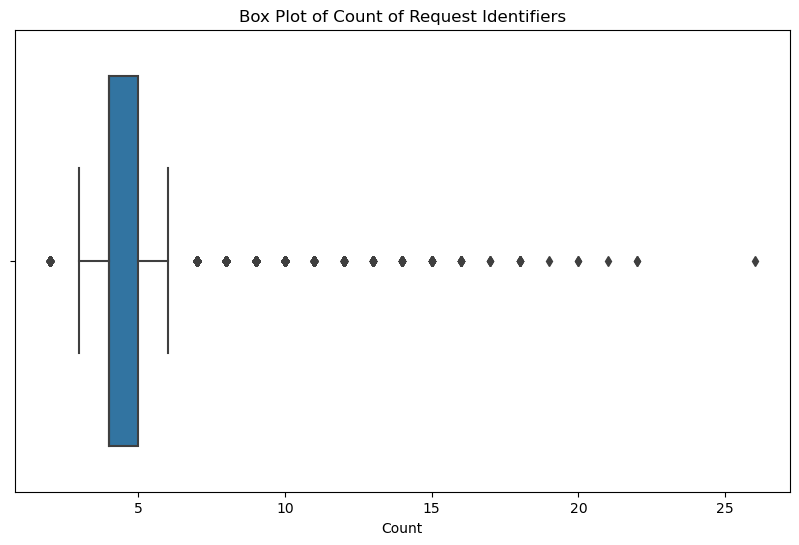

In [16]:
# Assuming value_counts_df contains the DataFrame with counts
plt.figure(figsize=(10, 6))
sns.boxplot(x="Count", data=value_counts_df)
plt.title("Box Plot of Count of Request Identifiers")
plt.xlabel("Count")
plt.show()

In [17]:
# Get the activities that surpass the predicted end date
task_exec[task_exec["Task execution end date"] > task_exec["Task predicted end date"]]

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638.0,569.0,Execution,Task executed with success,282
13,1589606,4,2022-04-13 08:15:40.310,2022-04-20 15:01:27.830,2022-04-20 15:02:55.463,2022-04-13 15:30:00.377,102,538.0,1301.0,Execution,Task returned to team,290
14,1606251,4,2022-04-20 15:02:55.713,2022-04-21 09:45:54.533,2022-04-21 11:54:31.433,2022-04-13 15:30:00.377,102,507.0,1336.0,Execution,NaN,271
15,1609274,4,2022-04-21 11:54:32.263,2022-04-26 09:54:32.757,2022-04-26 09:54:32.757,2022-04-26 09:54:32.317,101,NaN,NaN,Requester response to rejection,Task automaticaly terminated - SLA time reached,2981
17,1589670,5,2022-04-13 08:37:36.070,2022-04-21 09:51:02.400,2022-04-21 16:42:48.817,2022-04-13 15:37:36.137,102,507.0,1336.0,Execution,Task returned to team,290
...,...,...,...,...,...,...,...,...,...,...,...,...
208994,6649810,45768,2024-04-03 11:58:07.320,2024-04-09 15:31:52.430,2024-04-09 15:32:39.060,2024-04-04 09:58:07.387,104,10942.0,453.0,Execution,Task executed with success,282
208995,6692068,45768,2024-04-09 15:32:39.317,2024-04-16 10:32:40.020,2024-04-16 10:32:40.020,2024-04-16 10:32:39.390,107,NaN,NaN,Final task,Task automaticaly terminated - SLA time reached,888
209000,6633736,45769,2024-04-01 16:30:56.657,2024-04-02 11:14:06.447,2024-04-02 11:34:06.210,2024-04-02 08:42:53.370,104,9549.0,347.0,Execution,Task executed with success,282
209001,6638514,45769,2024-04-02 11:34:06.487,2024-04-08 15:34:06.770,2024-04-08 15:34:06.770,2024-04-08 15:34:06.540,107,NaN,NaN,Final task,Task automaticaly terminated - SLA time reached,888


In [18]:
# Analyzing KEY
task_exec[task_exec["Task Id"].duplicated(keep=False)]

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction


* At the first moment of the process (1º task) the model does not present predicted date
* Some Processes do not have task executer presented, nor the department (a bit higher)
* Some actions are null (but due to the fact we do not have all names of taks), so we should use the ID
* No problems with key of the table (so no need in keeping it)

**User Information Data**

In [19]:
cf.summary_stats(user_info)

HEAD OF DATASET:


,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
0,1872,F,1988,1,Yes,2024,N
1,11133,F,1975,1,Yes,2019,N
2,10332,F,1978,2,Yes,2019,N
3,10349,F,1976,3,Yes,2024,N
4,1394,F,1984,4,Yes,2021,N



TAIL OF DATASET:


,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
11365,3641,M,1968,21,No,2020,Y
11366,448,F,1974,5,Yes,2024,N
11367,9088,M,1971,5,Yes,2022,N
11368,2353,F,2000,22,Yes,2023,N
11369,1257,M,1986,3,Yes,2022,N



INFORMATION PANEL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Task Executer  11370 non-null  int64 
 1   Sex            11370 non-null  object
 2   BirthYear      11370 non-null  int64 
 3   Role ID        11370 non-null  int64 
 4   Is Manager     11370 non-null  object
 5   OrgUnitSince   11370 non-null  int64 
 6   IsOutSourcer   11370 non-null  object
dtypes: int64(4), object(3)
memory usage: 621.9+ KB


None


DATASET DESCRIPTION:


,count,mean,std,min,25%,50%,75%,max
Task Executer,11370.0,5685.483201,3282.386103,1.0,2843.25,5685.5,8527.75,11370.0
BirthYear,11370.0,1976.007476,15.476745,1901.0,1967.00,1975.0,1987.00,2050.0
Role ID,11370.0,17.669745,14.767423,1.0,8.00,21.0,21.00,123.0
OrgUnitSince,11370.0,2020.246174,4.393640,1966.0,2018.00,2022.0,2023.00,2024.0



ROW DUPLICATED: 24

MISSING VALUES:
Task Executer    0
Sex              0
BirthYear        0
Role ID          0
Is Manager       0
OrgUnitSince     0
IsOutSourcer     0
dtype: int64

MISSING VALUES in %:
Task Executer    0.0
Sex              0.0
BirthYear        0.0
Role ID          0.0
Is Manager       0.0
OrgUnitSince     0.0
IsOutSourcer     0.0
dtype: float64


In [20]:
# for each category apply the function
for i in ["Sex", "BirthYear","Is Manager", "IsOutSourcer"]:
    cf.print_unique_counts(user_info, i)
    print("\n")

Sex unique values:

M: 6048 (53.19%)
F: 4763 (41.89%)
 : 442 (3.89%)
U: 117 (1.03%)


BirthYear unique values:

1933: 547 (4.81%)
1966: 432 (3.80%)
1974: 419 (3.69%)
1973: 403 (3.54%)
1975: 400 (3.52%)
1967: 393 (3.46%)
1965: 391 (3.44%)
1968: 376 (3.31%)
1972: 376 (3.31%)
1971: 374 (3.29%)
1970: 347 (3.05%)
1969: 342 (3.01%)
1964: 337 (2.96%)
1976: 299 (2.63%)
1977: 266 (2.34%)
1980: 263 (2.31%)
1963: 258 (2.27%)
1982: 248 (2.18%)
1997: 233 (2.05%)
1979: 232 (2.04%)
1978: 226 (1.99%)
1999: 223 (1.96%)
1998: 222 (1.95%)
1981: 221 (1.94%)
1995: 220 (1.93%)
1994: 215 (1.89%)
2000: 214 (1.88%)
1962: 211 (1.86%)
1983: 202 (1.78%)
1996: 202 (1.78%)
1993: 191 (1.68%)
1984: 186 (1.64%)
1992: 170 (1.50%)
1991: 169 (1.49%)
1988: 157 (1.38%)
2001: 148 (1.30%)
1990: 145 (1.28%)
1989: 141 (1.24%)
1961: 139 (1.22%)
1985: 131 (1.15%)
1986: 122 (1.07%)
1960: 111 (0.98%)
1987: 111 (0.98%)
2002: 99 (0.87%)
1959: 65 (0.57%)
1958: 43 (0.38%)
2003: 39 (0.34%)
1957: 17 (0.15%)
1956: 15 (0.13%)
2004: 9 (0.0

In [21]:
# See duplicated data
user_info[user_info.duplicated(keep=False)].sort_values("Task Executer")

,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
10875,1135,M,1960,55,Yes,2016,N
1638,1135,M,1960,55,Yes,2016,N
1653,1135,M,1960,55,Yes,2016,N
8511,1135,M,1960,55,Yes,2016,N
4610,1135,M,1960,55,Yes,2016,N
10383,1373,M,1954,55,Yes,2014,N
3836,1373,M,1954,55,Yes,2014,N
7524,1427,M,1964,80,Yes,2016,N
1636,1427,M,1964,56,Yes,2014,N
6750,1427,M,1964,80,Yes,2016,N


In [22]:
# Task Executer duplicates
user_info[user_info["Task Executer"].duplicated(keep=False)].sort_values("Task Executer")

,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
10031,765,M,1982,45,Yes,2020,N
9919,765,M,1982,65,Yes,2016,N
4610,1135,M,1960,55,Yes,2016,N
1653,1135,M,1960,55,Yes,2016,N
1638,1135,M,1960,55,Yes,2016,N
...,...,...,...,...,...,...,...
5432,10882,F,1966,55,Yes,2018,N
1134,10882,F,1966,56,Yes,2018,N
232,10882,F,1966,39,Yes,2018,N
4700,11274,F,1962,95,Yes,2009,N


In [23]:
# Binary duplicates
user_info[["Is Manager","IsOutSourcer"]].drop_duplicates()

,Is Manager,IsOutSourcer
0,Yes,N
63,No,Y


* "Is Manager" and "IsOutSourcer" are perfect opposites so we can remove one of them as otherwise would lead to perfect collinearity
* Some rows are repeated!
* Some Executers update their role, leading to their ID being duplicated but with different roles
* Gender U and Nulls might be a problem, for good measure lets assume that both are the computer

**Specific Request Data**

In [24]:
cf.summary_stats(specif_req)

HEAD OF DATASET:


,idField,Request Identifier,Value
0,47,328,0
1,47,327,0
2,47,291,0
3,47,289,0
4,47,219,0



TAIL OF DATASET:


,idField,Request Identifier,Value
297551,1604,1995,90
297552,1604,2010,90
297553,1604,2280,90
297554,1604,2227,90
297555,3491,1784,90



INFORMATION PANEL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297556 entries, 0 to 297555
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   idField             297556 non-null  int64 
 1   Request Identifier  297556 non-null  int64 
 2   Value               297556 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.8+ MB


None


DATASET DESCRIPTION:


,count,mean,std,min,25%,50%,75%,max
idField,297556.0,2800.050737,1273.371432,47.0,3388.0,3391.0,3486.0,3935.0
Request Identifier,297556.0,22818.646319,13384.965985,1.0,11094.0,22738.0,34605.0,45772.0



ROW DUPLICATED: 0

MISSING VALUES:
idField               0
Request Identifier    0
Value                 0
dtype: int64

MISSING VALUES in %:
idField               0.0
Request Identifier    0.0
Value                 0.0
dtype: float64


In [25]:
# for each category apply the function
for i in ["Value"]:
    cf.print_unique_counts(specif_req, i)
    print("\n")

Value unique values:

10: 85761 (28.82%)
50: 35153 (11.81%)
30: 28320 (9.52%)
70: 22450 (7.54%)
20: 20092 (6.75%)
100: 19520 (6.56%)
60: 12935 (4.35%)
2: 7988 (2.68%)
40: 6075 (2.04%)
1: 4681 (1.57%)
80: 4081 (1.37%)
90: 3579 (1.20%)
5: 353 (0.12%)
0: 246 (0.08%)
-1: 209 (0.07%)
2023-03-26T23:00:00.000Z: 196 (0.07%)
2023-04-09T23:00:00.000Z: 193 (0.06%)
2023-05-01T23:00:00.000Z: 187 (0.06%)
2023-08-06T23:00:00.000Z: 183 (0.06%)
2023-07-30T23:00:00.000Z: 182 (0.06%)
-2: 178 (0.06%)
2023-07-02T23:00:00.000Z: 176 (0.06%)
2023-06-04T23:00:00.000Z: 174 (0.06%)
2022-12-05T00:00:00.000Z: 173 (0.06%)
2022-07-17T23:00:00.000Z: 168 (0.06%)
2023-08-13T23:00:00.000Z: 168 (0.06%)
2023-07-16T23:00:00.000Z: 166 (0.06%)
2023-05-21T23:00:00.000Z: 163 (0.05%)
2023-01-30T00:00:00.000Z: 163 (0.05%)
6: 163 (0.05%)
2022-12-12T00:00:00.000Z: 161 (0.05%)
2022-07-31T23:00:00.000Z: 160 (0.05%)
2022-10-02T23:00:00.000Z: 157 (0.05%)
2022-09-04T23:00:00.000Z: 156 (0.05%)
2023-07-23T23:00:00.000Z: 155 (0.05%)
2023-

In [26]:
specif_req[specif_req["idField"].duplicated(keep=False)]

,idField,Request Identifier,Value
0,47,328,0
1,47,327,0
2,47,291,0
3,47,289,0
4,47,219,0
...,...,...,...
297551,1604,1995,90
297552,1604,2010,90
297553,1604,2280,90
297554,1604,2227,90


* What is value?
* Shouldnt be id Field unique or something?
* What is this table, what it means?

**Rejections Data**

In [27]:
cf.summary_stats(rej)

HEAD OF DATASET:


,Task Id,idBPMRequirement
0,1606251,191
1,1606786,183
2,1629944,183
3,1643257,183
4,1643929,183



TAIL OF DATASET:


,Task Id,idBPMRequirement
4094,6622014,183
4095,6626674,183
4096,6628563,183
4097,6636694,183
4098,6636734,183



INFORMATION PANEL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Task Id           4099 non-null   int64
 1   idBPMRequirement  4099 non-null   int64
dtypes: int64(2)
memory usage: 64.2 KB


None


DATASET DESCRIPTION:


,count,mean,std,min,25%,50%,75%,max
Task Id,4099.0,3.948209e+06,1.357112e+06,1606251.0,2887927.0,4004444.0,4822927.0,6636734.0
idBPMRequirement,4099.0,2.550905e+02,1.028364e+02,183.0,183.0,300.0,300.0,1436.0



ROW DUPLICATED: 0

MISSING VALUES:
Task Id             0
idBPMRequirement    0
dtype: int64

MISSING VALUES in %:
Task Id             0.0
idBPMRequirement    0.0
dtype: float64


In [28]:
# Is task repeated?
rej[rej["Task Id"].duplicated(keep=False)]

,Task Id,idBPMRequirement
8,1647860,191
9,1647860,300
10,1647860,331
11,1647860,353
12,1647860,661
...,...,...
4081,6614200,353
4084,6615839,183
4085,6615839,353
4086,6616457,183


* Only rejected process wil have data here?
* The same task Id have multiple BPM Requirement (a list to solve?)

<hr>

<a class="anchor" id="2_2">

## 2.2. Visualizing Data

</a>

In [29]:
# SAVING OG DATASETS
task_exec_viz = task_exec.copy()
user_info_viz = user_info.copy()
specif_req_viz = specif_req.copy()
rej_viz = rej.copy()

In [30]:
# Define a function to plot counts for a given category
def plot_task_counts(df, category):
    counts = df.groupby(category).size().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(f'{category} Histogram')
    plt.xlabel(category)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)
    plt.tight_layout()
    plt.show()


**Task Execution Data**

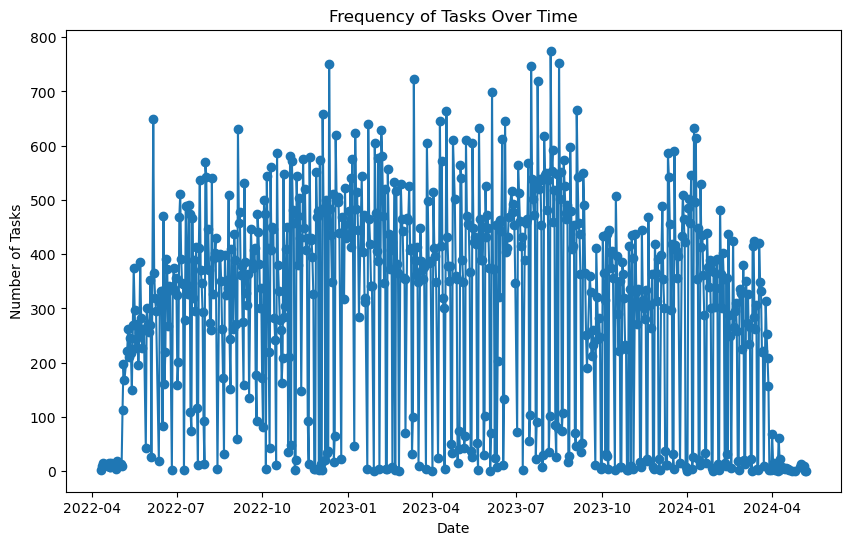

In [31]:
# Extract the date from the "Task arrival date"
task_exec_viz['Task arrival date'] = pd.to_datetime(task_exec_viz['Task arrival date'])
task_exec_viz['Date'] = task_exec_viz['Task arrival date'].dt.date

# Count the number of tasks per day
task_counts = task_exec_viz.groupby('Date').count()['Task Id']

# Create the line plot
plt.figure(figsize=(10, 6))
task_counts.plot(kind='line', marker='o')
plt.title('Frequency of Tasks Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tasks')
plt.grid(False)
plt.show()

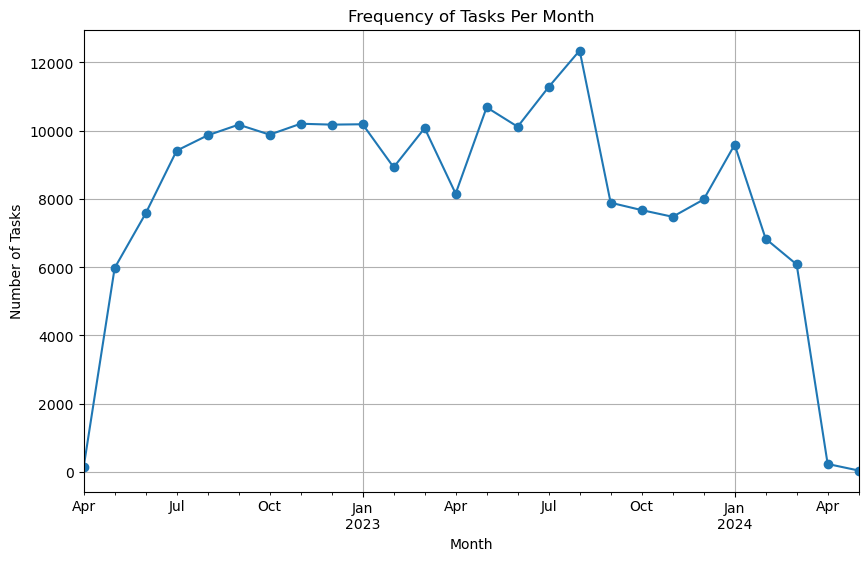

In [32]:
# Extract the year and month from the "Task arrival date"
task_exec_viz['YearMonth'] = task_exec_viz['Task arrival date'].dt.to_period('M')

# Count the number of tasks per month
task_counts_monthly = task_exec_viz.groupby('YearMonth').count()['Task Id']

# Step 4: Create the line plot
plt.figure(figsize=(10, 6))
task_counts_monthly.plot(kind='line', marker='o')
plt.title('Frequency of Tasks Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tasks')
plt.grid(True)
plt.show()

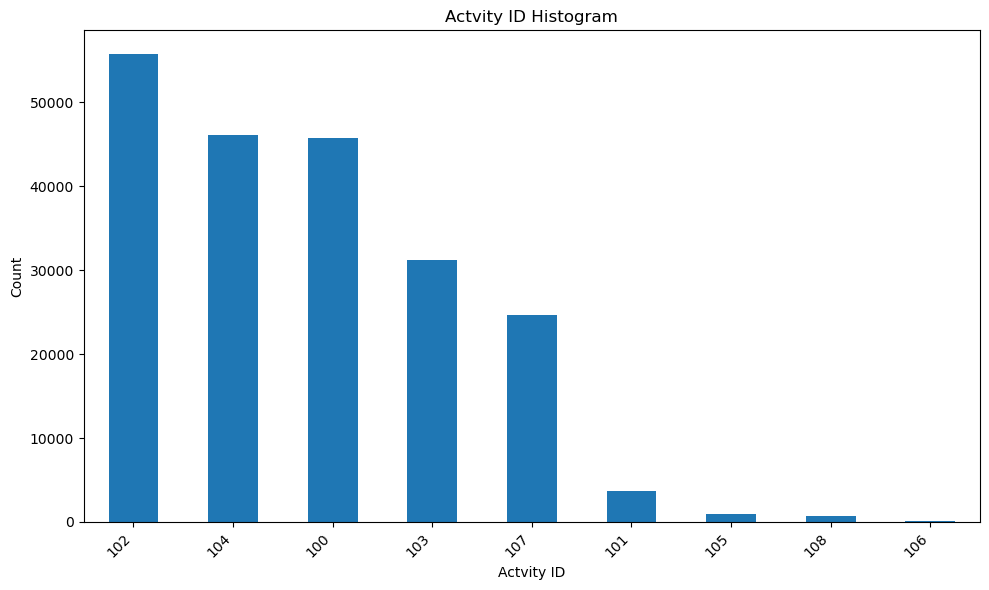

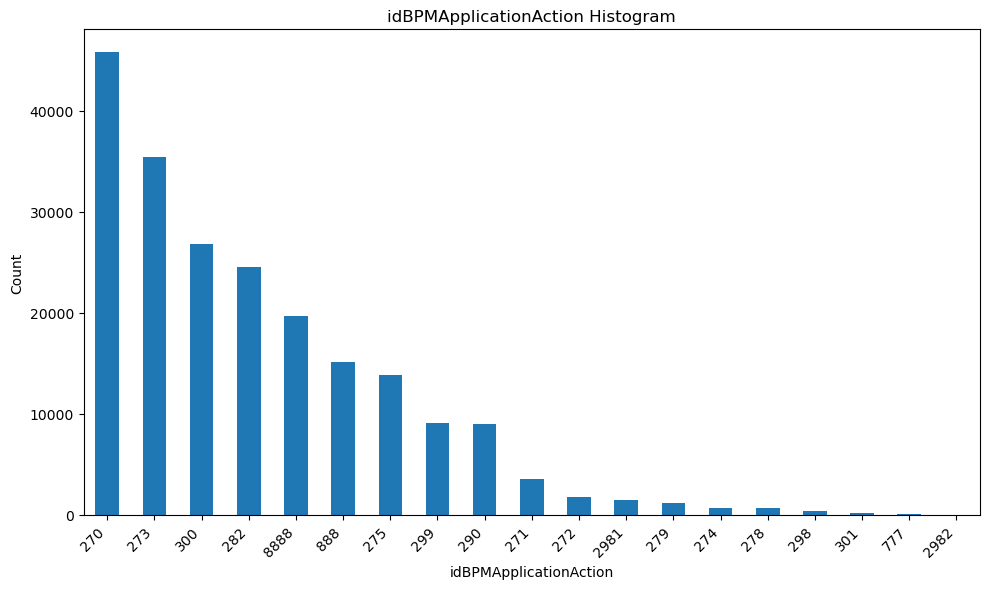

In [33]:
# Plot for each category
categories = ['Actvity ID', 'idBPMApplicationAction']
for category in categories:
    plot_task_counts(task_exec_viz,category)

* These two graphs measure the number of task per each task and activity

**User Information Data**

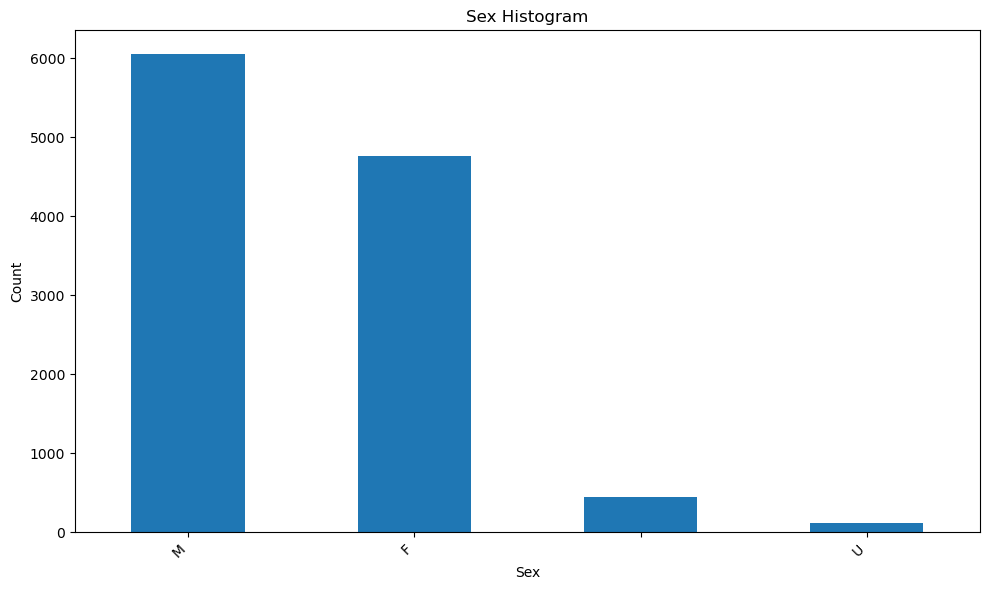

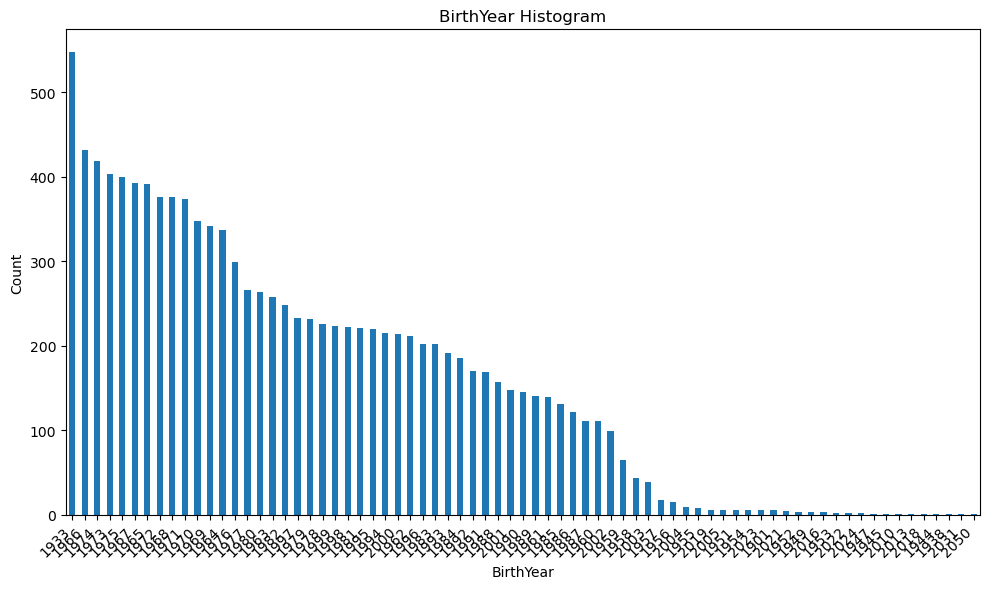

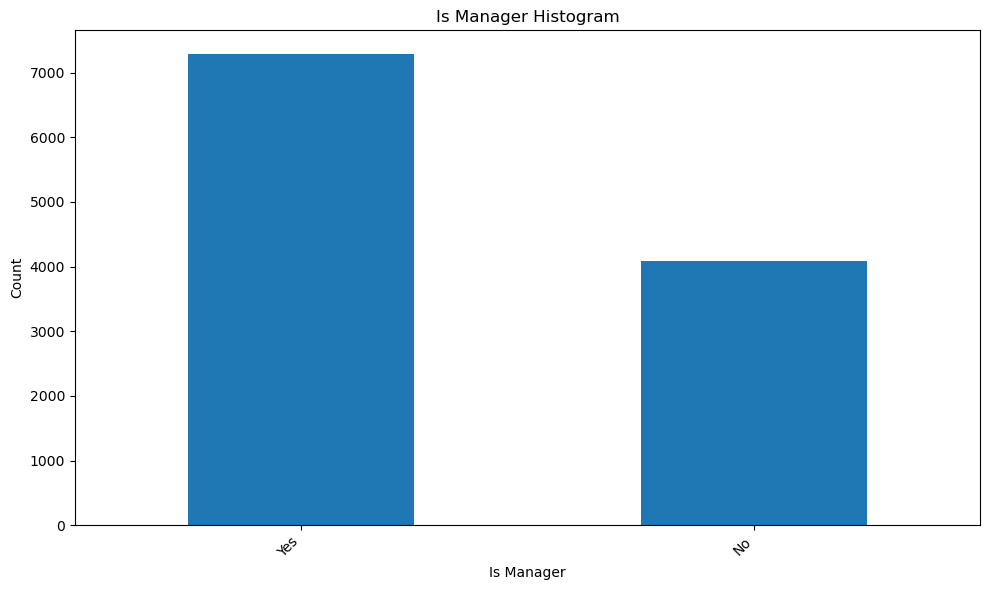

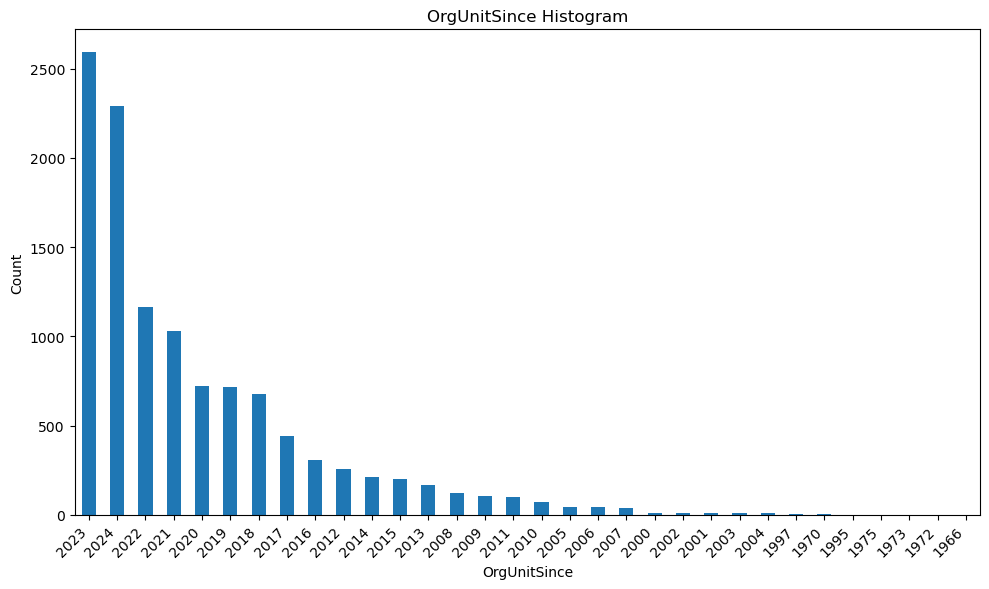

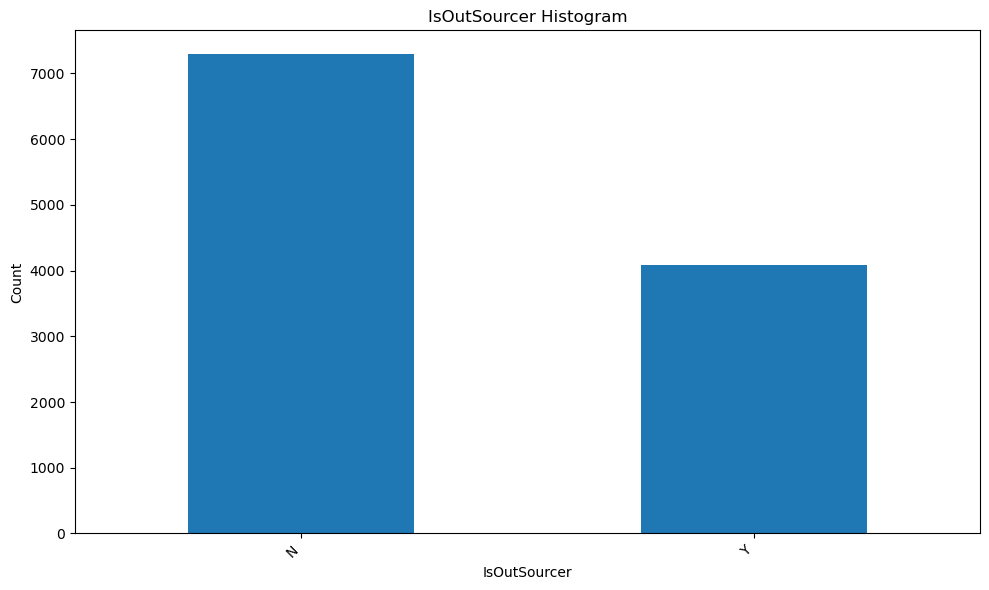

In [34]:
# Plot for each category
categories = ['Sex','BirthYear','Is Manager', 'OrgUnitSince', 'IsOutSourcer']
for category in categories:
    plot_task_counts(user_info_viz, category)

* These graphs regard information about each individual Task Executer, how many are on a spicific category

**Specific Request Data**

In [35]:
# SPECIFIC REQUEST

# Create a pivot table with "Request Identifier" as rows and other columns ("ID" and "Value")
specif_req_viz = specif_req_viz.pivot_table(index='Request Identifier', columns='idField', values='Value', aggfunc='first')

# Flatten the columns for better readability (optional)
specif_req_viz.columns = [f'ID_{col}' for col in specif_req_viz.columns]
specif_req_viz = specif_req_viz.reset_index()

# Fill NaN
specif_req_viz.fillna(0, inplace=True)
specif_req_viz

,Request Identifier,ID_47,ID_203,ID_1602,ID_1604,ID_3388,ID_3390,ID_3391,ID_3420,ID_3486,ID_3491,ID_3935
0,1,1,2022-04-10T23:00:00.000Z,1,90,10,0,10,20,10,10,0
1,2,0,2022-04-11T23:00:00.000Z,0,0,10,10,10,20,10,10,0
2,3,0,2022-04-11T23:00:00.000Z,0,0,30,10,0,10,30,0,0
3,4,0,2022-04-12T23:00:00.000Z,0,0,10,10,0,20,10,0,0
4,5,0,2022-04-05T23:00:00.000Z,0,0,20,30,10,10,30,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45767,45768,0,2024-03-31T23:00:00.000Z,0,0,50,10,70,0,50,10,0
45768,45769,0,2024-03-31T23:00:00.000Z,0,0,50,100,70,0,50,10,0
45769,45770,2,2024-03-31T23:00:00.000Z,2,100,40,10,60,0,30,0,50
45770,45771,1,2024-04-11T23:00:00.000Z,1,90,30,20,60,0,30,0,50


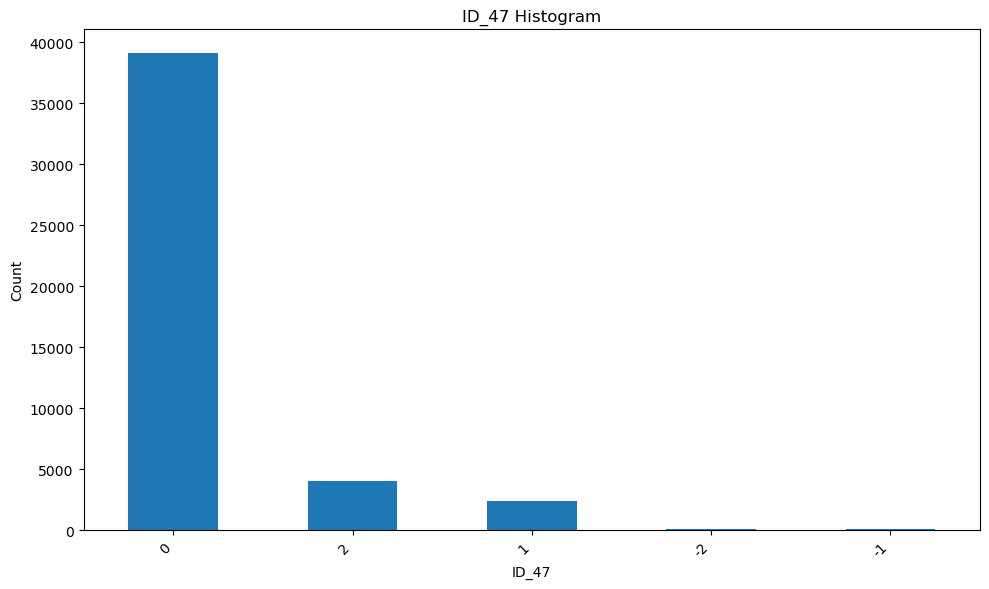

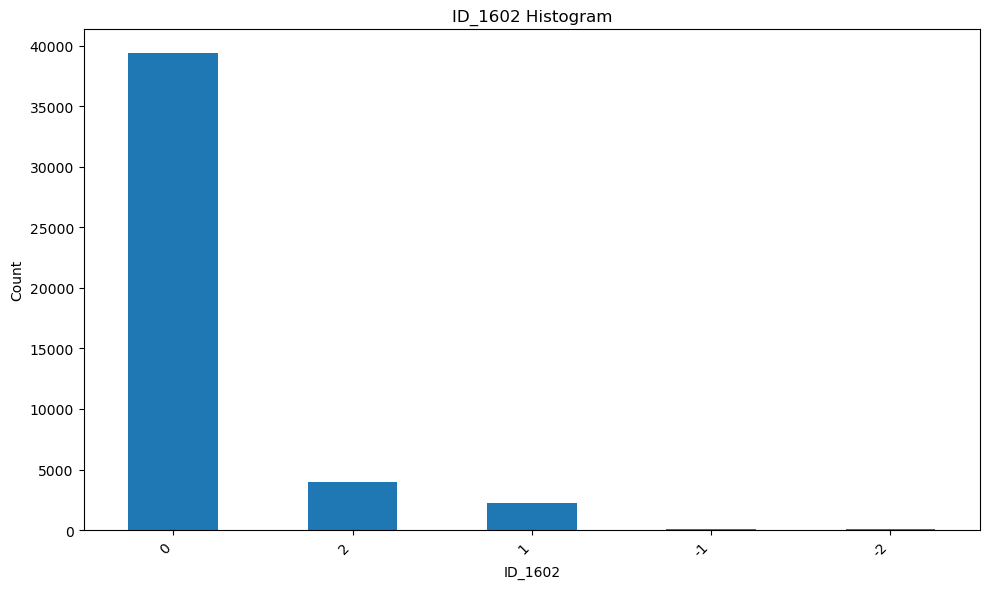

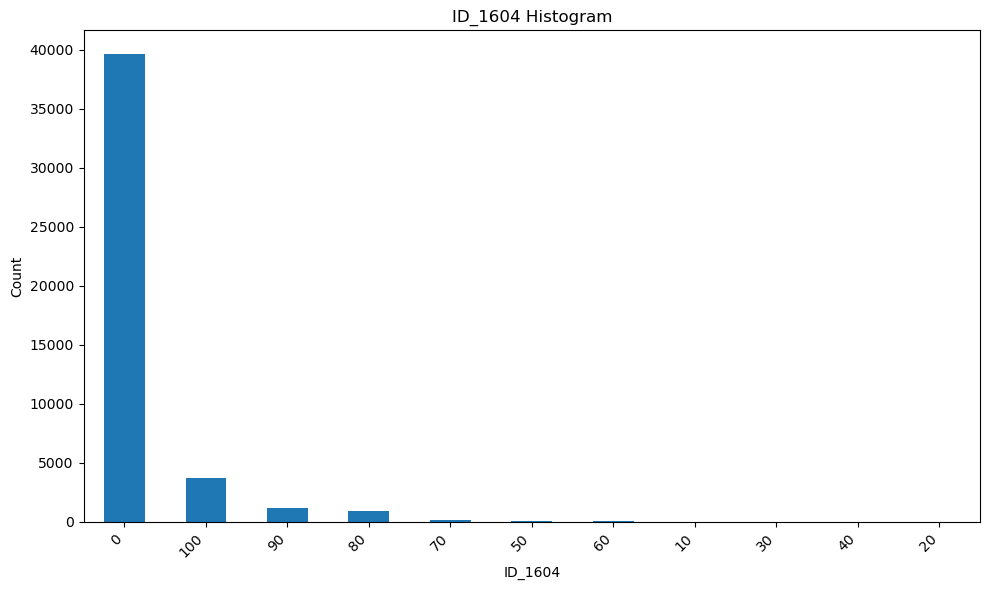

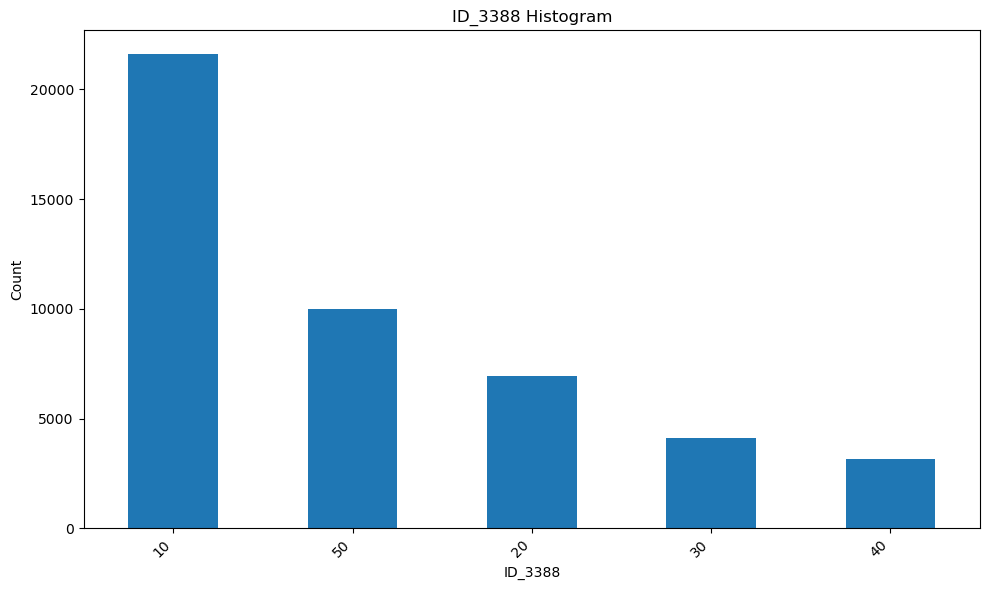

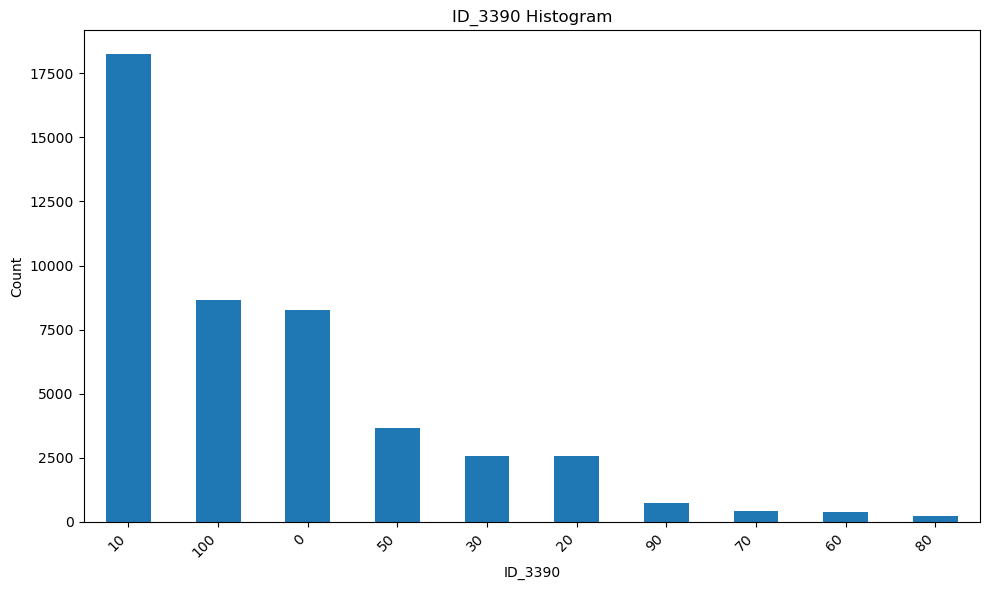

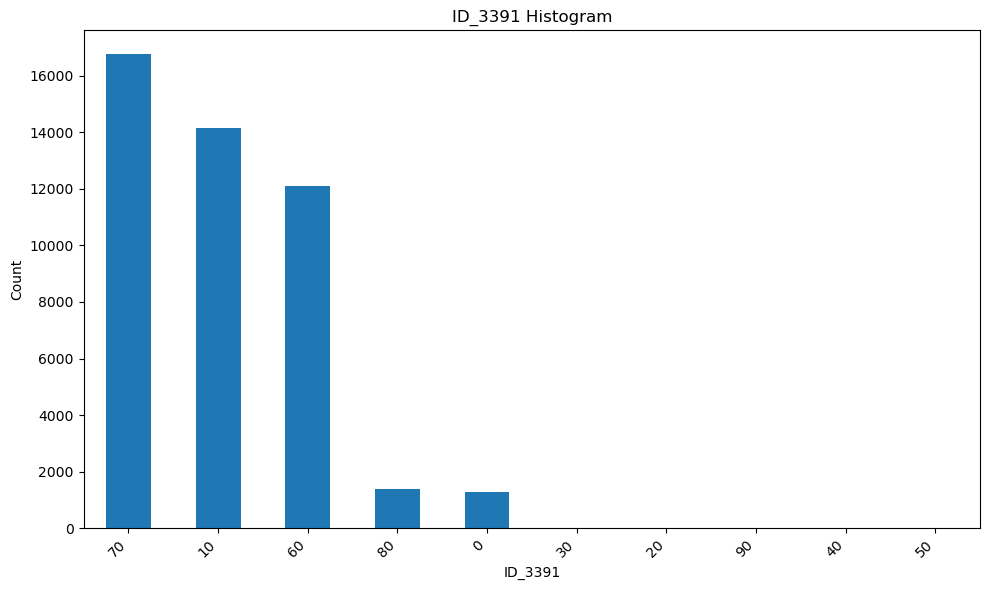

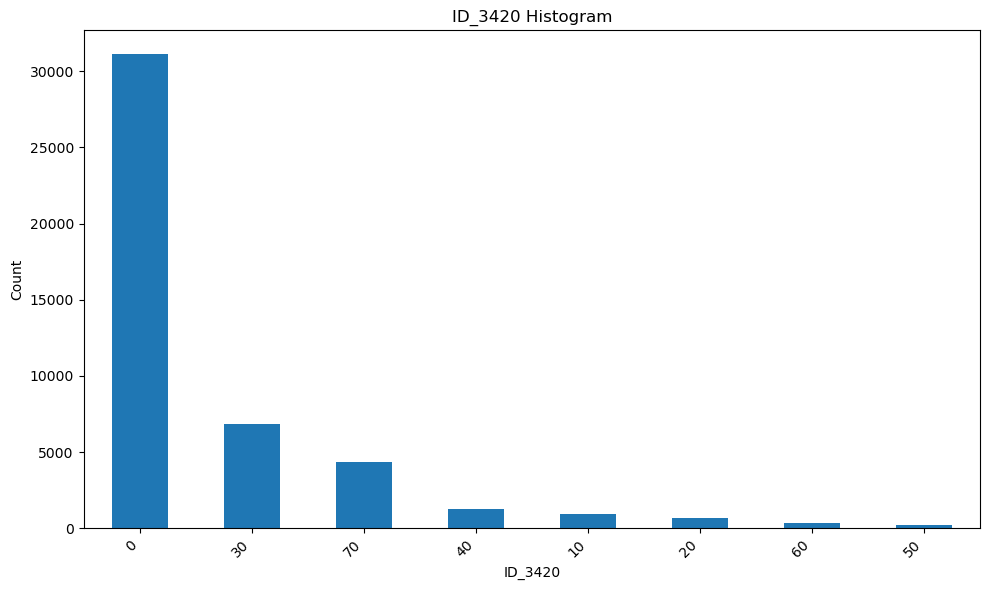

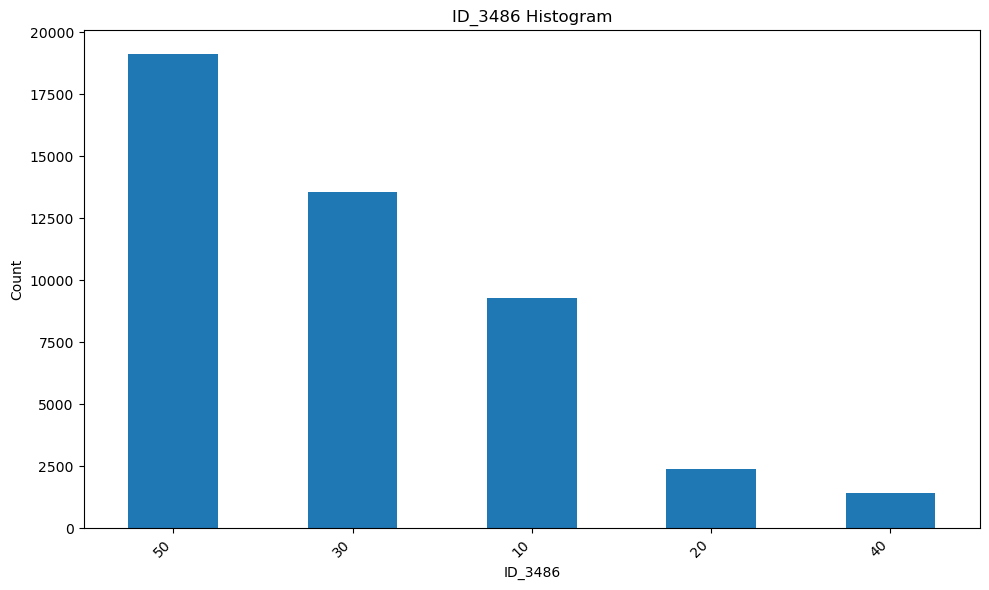

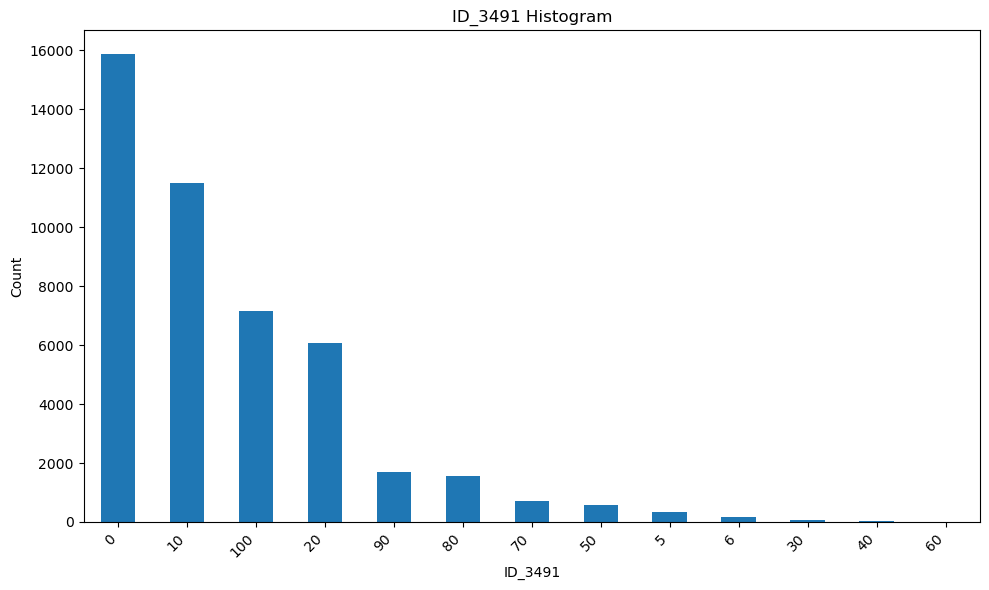

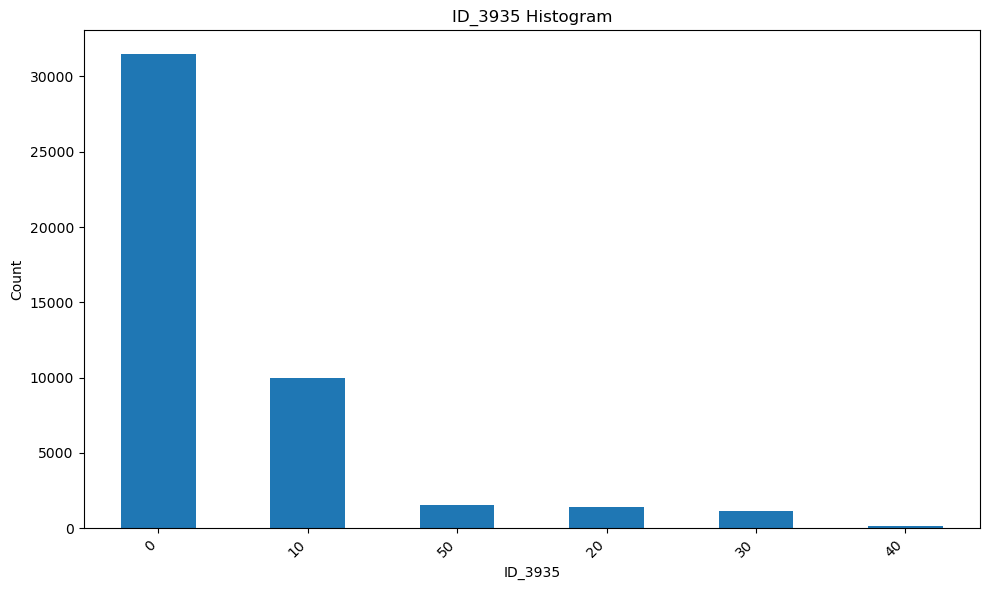

In [36]:
# Plot for each category
categories = ['ID_47','ID_1602','ID_1604', 'ID_3388', 'ID_3390','ID_3391','ID_3420','ID_3486','ID_3491','ID_3935']
for category in categories:
    plot_task_counts(specif_req_viz, category)

* These graphs are about the form filled by the client when requesting something, althought we dont know what it is, we though it would be interesting to vizualize the quantity each category of each form question is chosen

**Rejections Data**

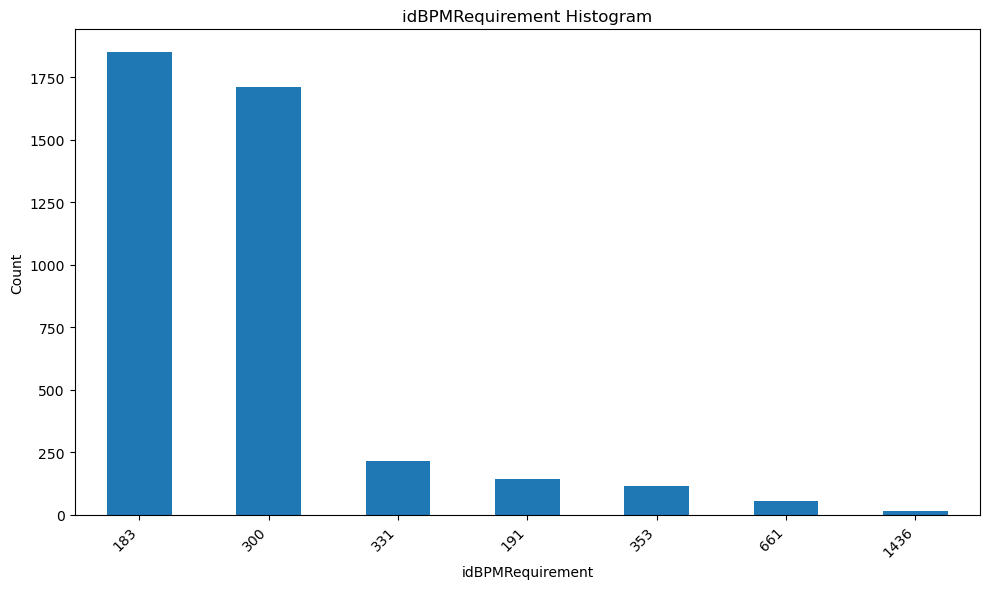

In [37]:
# Plot for each category
categories = ['idBPMRequirement']
for category in categories:
    plot_task_counts(rej_viz, category)

* Data regarding BPM Requirements when a process is rejected, so interesting to know what is the most common requirement

**Additional Visualizations using Celonis**

* Since most interesting data analysis made in this project is understanding the main process, we use the Celonis App to make the more relevant details about the data

![Local Image](Images/1.jpg)

![Local Image](Images/2.jpg)

![Local Image](Images/3.jpg)

![Local Image](Images/4.png)

![Local Image](Images/5.png)

![Local Image](Images/6.jpg)

<hr>

<a class="anchor" id="3">

# 3. Data Preprocessing

</a>

In [38]:
# SAVING OG DATASETS
task_exec_og = task_exec.copy()
user_info_og = user_info.copy()
specif_req_og = specif_req.copy()
rej_og = rej.copy()

One of the main goals is grouping all dataframes into one! For this some transformations are needed!

In [39]:
# REJECTIONS DATA

# For the rejection, lets group all the requirements in a list for each task
rej = rej_og.groupby('Task Id')['idBPMRequirement'].agg(list).reset_index()
rej.head()

,Task Id,idBPMRequirement
0,1606251,[191]
1,1606786,[183]
2,1629944,[183]
3,1643257,[183]
4,1643929,[183]


In [40]:
# SPECIFIC REQUEST
specif_req = specif_req_og.copy()

# Create a pivot table with "Request Identifier" as rows and other columns ("ID" and "Value")
specif_req = specif_req.pivot_table(index='Request Identifier', columns='idField', values='Value', aggfunc='first')

# Flatten the columns for better readability (optional)
specif_req.columns = [f'ID_{col}' for col in specif_req.columns]
specif_req = specif_req.reset_index()

# Fill NaN
specif_req.fillna(0, inplace=True)
specif_req

,Request Identifier,ID_47,ID_203,ID_1602,ID_1604,ID_3388,ID_3390,ID_3391,ID_3420,ID_3486,ID_3491,ID_3935
0,1,1,2022-04-10T23:00:00.000Z,1,90,10,0,10,20,10,10,0
1,2,0,2022-04-11T23:00:00.000Z,0,0,10,10,10,20,10,10,0
2,3,0,2022-04-11T23:00:00.000Z,0,0,30,10,0,10,30,0,0
3,4,0,2022-04-12T23:00:00.000Z,0,0,10,10,0,20,10,0,0
4,5,0,2022-04-05T23:00:00.000Z,0,0,20,30,10,10,30,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45767,45768,0,2024-03-31T23:00:00.000Z,0,0,50,10,70,0,50,10,0
45768,45769,0,2024-03-31T23:00:00.000Z,0,0,50,100,70,0,50,10,0
45769,45770,2,2024-03-31T23:00:00.000Z,2,100,40,10,60,0,30,0,50
45770,45771,1,2024-04-11T23:00:00.000Z,1,90,30,20,60,0,30,0,50


In [41]:
# USER INFORMATION

# Remove duplicates
user_info = user_info.drop_duplicates()

# Remove duplicates by last payload
user_info_sorted = user_info.sort_values(by=["Task Executer", "OrgUnitSince"])
user_info = user_info_sorted.drop_duplicates(subset="Task Executer", keep="last")

# Missing Sex is consider User/Bots
user_info["Sex"].replace(" ", "U", inplace=True)

# Get age by 2024
user_info["Age"] = 2024 - user_info["BirthYear"]

# Remove Is Manager since it the perfect opposite of Is Out Sourcer and Age
user_info.drop(["Is Manager","BirthYear"],axis=1, inplace=True)

* Bots/Users are fully outsource

**ORGANIZING TASK EXECUTION DATASET**

In [42]:
# Missing Sex is consider User/Bots
user_info["Sex"].replace(" ", "U", inplace=True)

In [43]:
# Merging user data and rejection information to task execution data
task_exec = task_exec.merge(rej, on="Task Id", how="left")
task_exec = task_exec.merge(user_info, on="Task Executer", how="left")

In [44]:
# Convert columns to datetime format with unit specification
task_exec["Task execution end date"] = pd.to_datetime(task_exec["Task execution end date"], errors='coerce', unit='ns')
task_exec["Task arrival date"] = pd.to_datetime(task_exec["Task arrival date"], errors='coerce', unit='ns')
task_exec["Task predicted end date"] = pd.to_datetime(task_exec["Task predicted end date"], errors='coerce', unit='ns')

# Calculate "Time surpassed"
task_exec["Time surpassed"] = task_exec["Task execution end date"] - task_exec["Task predicted end date"]

# Convert timedelta to seconds using apply
task_exec["Time surpassed"] = task_exec["Time surpassed"].apply(lambda x: x.total_seconds()/60/60)

# If negative then should be 0
task_exec["Time surpassed"] = task_exec["Time surpassed"].apply(lambda x: 0 if x < 0 else x)

In [45]:
task_exec.head()

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction,idBPMRequirement,Sex,Role ID,OrgUnitSince,IsOutSourcer,Age,Time surpassed
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638.0,569.0,Initial Request,Submit initial request,270,NaN,M,5.0,2021.0,N,57.0,NaN
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322.0,1104.0,Execution,NaN,273,NaN,F,21.0,2024.0,Y,57.0,0.000000
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606.0,NaN,Execution,NaN,273,NaN,F,11.0,2023.0,N,49.0,0.000000
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638.0,569.0,Execution,Task executed with success,282,NaN,M,5.0,2021.0,N,57.0,668.437698
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638.0,569.0,Final task,Request accepted by requester,299,NaN,M,5.0,2021.0,N,57.0,0.000000


**MISSING VALUES**

In [46]:
task_exec.isnull().sum()

Task Id                          0
Request Identifier               0
Task arrival date                0
Task capture date                0
Task execution end date          0
Task predicted end date      45785
Actvity ID                       0
Task Executer                20129
Task executer department     27130
Task Type                        0
Action                       84441
idBPMApplicationAction           0
idBPMRequirement            205471
Sex                          20129
Role ID                      20129
OrgUnitSince                 20129
IsOutSourcer                 20129
Age                          20129
Time surpassed               45785
dtype: int64

In [47]:
# Analyzing missin in predicted end date
task_exec[task_exec["Task predicted end date"].isna()]["Actvity ID"].unique()

array([100, 107, 104], dtype=int64)

* Most missings in the *"Task predicted end date"* columns are due to being the first activity in the process, but in other cases like 107 and 104 they are very few, and since the impact of being null is minimal for future calculations we will not change this
* In the *"Actions"* column, since some names were not given they are nulls, the only thing was save the map of names and remove the column
* "idBPMRequirements" regards only rejected processes, so only those will have any information

*TASK EXECUTER & TASK EXECUTER DEPARTMENT*

In [48]:
task_exec[task_exec["Task Executer"].isna()].head()

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction,idBPMRequirement,Sex,Role ID,OrgUnitSince,IsOutSourcer,Age,Time surpassed
15,1609274,4,2022-04-21 11:54:32.263,2022-04-26 09:54:32.757,2022-04-26 09:54:32.757,2022-04-26 09:54:32.317,101,NaN,NaN,Requester response to rejection,Task automaticaly terminated - SLA time reached,2981,NaN,NaN,NaN,NaN,NaN,NaN,0.000122
53,1602749,12,2022-04-19 16:02:08.233,2022-04-27 11:02:08.633,2022-04-27 11:02:08.633,2022-04-27 11:02:08.297,107,NaN,NaN,Final task,Task automaticaly terminated - SLA time reached,888,NaN,NaN,NaN,NaN,NaN,NaN,0.000093
56,1625962,13,2022-04-28 12:02:50.183,2022-05-05 15:16:32.910,2022-05-05 15:19:12.330,2022-04-18 10:24:41.830,102,NaN,1104.0,Execution,Task returned to team,290,NaN,NaN,NaN,NaN,NaN,NaN,412.908472
60,1836814,13,2022-06-14 11:04:09.720,2022-06-21 15:04:13.713,2022-06-21 15:04:13.713,2022-06-21 15:04:09.877,107,NaN,NaN,Final task,Task automaticaly terminated - SLA time reached,888,NaN,NaN,NaN,NaN,NaN,NaN,0.001066
79,1803881,17,2022-06-07 08:15:06.323,2022-06-14 12:30:02.690,2022-06-14 12:30:02.690,2022-06-14 12:30:00.073,107,NaN,NaN,Final task,Task automaticaly terminated - SLA time reached,888,NaN,NaN,NaN,NaN,NaN,NaN,0.000727


In [49]:
# Passo 1: Preencher os valores ausentes na coluna "Task Executer Department" com -1

task_exec["Task executer department"].fillna(-1, inplace=True)

# Passo 2: Criar um mapeamento entre os valores únicos da coluna "Task Executer Department" e os valores negativos desejados
unique_departments = task_exec["Task executer department"].unique()
department_mapping = {department: -(i + 2) for i, department in enumerate(unique_departments)}

# Passo 3: Aplicar o mapeamento para preencher os valores ausentes na coluna "Task Executer"
task_exec["Task Executer"].fillna(task_exec["Task executer department"].map(department_mapping), inplace=True)

In [50]:
task_exec[task_exec["Task Executer"]<0].head()

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction,idBPMRequirement,Sex,Role ID,OrgUnitSince,IsOutSourcer,Age,Time surpassed
15,1609274,4,2022-04-21 11:54:32.263,2022-04-26 09:54:32.757,2022-04-26 09:54:32.757,2022-04-26 09:54:32.317,101,-4.0,-1.0,Requester response to rejection,Task automaticaly terminated - SLA time reached,2981,NaN,NaN,NaN,NaN,NaN,NaN,0.000122
53,1602749,12,2022-04-19 16:02:08.233,2022-04-27 11:02:08.633,2022-04-27 11:02:08.633,2022-04-27 11:02:08.297,107,-4.0,-1.0,Final task,Task automaticaly terminated - SLA time reached,888,NaN,NaN,NaN,NaN,NaN,NaN,0.000093
56,1625962,13,2022-04-28 12:02:50.183,2022-05-05 15:16:32.910,2022-05-05 15:19:12.330,2022-04-18 10:24:41.830,102,-3.0,1104.0,Execution,Task returned to team,290,NaN,NaN,NaN,NaN,NaN,NaN,412.908472
60,1836814,13,2022-06-14 11:04:09.720,2022-06-21 15:04:13.713,2022-06-21 15:04:13.713,2022-06-21 15:04:09.877,107,-4.0,-1.0,Final task,Task automaticaly terminated - SLA time reached,888,NaN,NaN,NaN,NaN,NaN,NaN,0.001066
79,1803881,17,2022-06-07 08:15:06.323,2022-06-14 12:30:02.690,2022-06-14 12:30:02.690,2022-06-14 12:30:00.073,107,-4.0,-1.0,Final task,Task automaticaly terminated - SLA time reached,888,NaN,NaN,NaN,NaN,NaN,NaN,0.000727


* So to treat missing values of these 2 columns we opted to fill with temporary value, the goal of this value is just to serve as a different value to differentiate in summarization (in unique counts)
* Regarding additional information from the client, these clients won't affect that information (nor positively nor negatively)

**MAPPING OUTCOME**

To simplify code we will attribute already a encoded value:

* Request Finish -> 1
* Closed Administrative -> 2
* Request Canceled -> 3
* Closed Admini Rquester Rejects Accounting Impact -> 4

In [51]:
# Group by Request, with last Activity and last Action available
outcome_map = task_exec.groupby("Request Identifier").agg({
    "Actvity ID": "last",
    "idBPMApplicationAction": "last"
})

# Rename
outcome_map.rename({"idBPMApplicationAction":"Last Action","Actvity ID":"Last Activity ID"}, inplace=True, axis=1)

# Reset index
outcome_map.reset_index(inplace=True)

In [52]:
# Define the mapping of conditions to outcomes
condition_outcome_map = {
    # No cases but mapping just to be sure
    (103, 8888): 2,
    (103, 888): 2,
    (106, 8888): 2,
    (106, 888): 2,
    (108, 8888): 2,
    (108, 888): 2,
    # Mapped according Diagram
    (107, 299): 1,
    (101, 298): 3,
    (101, 2981): 3,
    (104, 8888): 4,
    (107, 8888): 2,
    # Mapped according to other flows
    (107, 888): 2,
    # Assuming that 298 regards Canceled Request
    (102, 298): 3,
    (105, 298): 3
}

# Apply the mapping to create the "Outcome" column
outcome_map['Outcome'] = [condition_outcome_map.get((activity_id, action), "Not Finished Yet!") for activity_id, action in zip(outcome_map['Last Activity ID'], outcome_map['Last Action'])]

In [53]:
# Visualize unfinished Outcomes
filter_outcome = outcome_map[outcome_map["Outcome"]=="Not Finished Yet!"]
print("Unfineshed Process:")
display(filter_outcome)
print("\n")

# Visualize wieght of each category
for i in ["Outcome"]:
    cf.print_unique_counts(outcome_map, i)
    print("\n")

# Remove Unfinished process
outcome_map = outcome_map.query('~((`Last Activity ID` == 103) & (`Last Action` == 300))')

# Change type to int
outcome_map["Outcome"] = outcome_map["Outcome"].astype("int")

Unfineshed Process:


,Request Identifier,Last Activity ID,Last Action,Outcome
6896,6897,103,300,Not Finished Yet!




Outcome unique values:

4: 19678 (42.99%)
2: 15118 (33.03%)
1: 9056 (19.79%)
3: 1919 (4.19%)
Not Finished Yet!: 1 (0.00%)




In [54]:
# Remove unfinished process from main dataframe
task_exec = task_exec[task_exec["Request Identifier"]!=6897]

**PREFIX EXTRACTION & BUCKETING**

In [55]:
categorical_columns = ['Out-Sourced Involved', 'Hour Task Arrival Moment', 'Month Task Arrival Moment',
                       'W/ BPM Requirements', 'Activity_2', 'Activity_3', 'Activity_4',
                       'Activity_5', 'Activity_6', 'Activity_7', 'Action_2', 'Action_3',
                       'Action_4', 'Action_5', 'Action_6', 'Action_7', 'ID_47', 'ID_1602',
                       'ID_1604', 'ID_3388', 'ID_3390', 'ID_3391', 'ID_3420', 'ID_3486',
                       'ID_3491', 'ID_3935', 'Executer_1', 'Executer_2', 'Executer_3',
                       'Executer_4', 'Executer_5', 'Executer_6', 'Executer_7',     
                       'Outcome']

In [56]:
numerical_columns = ["Total Time surpassed (hours)", "Number of Executers", "Number of Depart. Involved"
                    "Mean Age of Executers", "Mean Time on Department", "Duration (hours)", "Time to Start Process"]

*1 PREFIXES BUCKET*

In [57]:
# Use function to create bucket
prefix_1 = cf.get_first_x_rows_per_process(task_exec,"Request Identifier", 1)

# FEATURE ENGINEERING: Hour of Arrival
prefix_1['Hour Task Arrival Moment'] = prefix_1['Task arrival date'].dt.hour

# FEATURE ENGINEERING: Month of Arrival
prefix_1['Month Task Arrival Moment'] = prefix_1['Task arrival date'].dt.month

# Join Specific Request information
prefix_1 = prefix_1.merge(specif_req, how="left", on="Request Identifier")

# Convert the 'Date' column to datetime type
prefix_1["ID_203"] = pd.to_datetime(prefix_1["ID_203"], utc=True)

# Then convert to timezone-naive by removing the timezone information
prefix_1["ID_203"] = prefix_1["ID_203"].dt.tz_localize(None)

# Calculate Time to Start Process
prefix_1["Time to Start Process"] =  prefix_1['Task arrival date']-prefix_1["ID_203"]
prefix_1["Time to Start Process"] = prefix_1["Time to Start Process"].apply(lambda x: x.total_seconds()/60/60)

# Select Features that work without any task info
prefix_1= prefix_1[["Request Identifier", "Month Task Arrival Moment", "Hour Task Arrival Moment",
                   "ID_47", "ID_1602", "ID_1604","ID_3388", "ID_3390", "ID_3391", "ID_3420", "ID_3486", 
                   "ID_3491", "ID_3935","Time to Start Process"]]

# Join Outcome
prefix_1 = prefix_1.merge(outcome_map[["Request Identifier", "Outcome"]], on="Request Identifier", how="left")

# Drop Index column
prefix_1.drop("Request Identifier", axis=1, inplace=True)

prefix_1.head(3)

,Month Task Arrival Moment,Hour Task Arrival Moment,ID_47,ID_1602,ID_1604,ID_3388,ID_3390,ID_3391,ID_3420,ID_3486,ID_3491,ID_3935,Time to Start Process,Outcome
0,4,16,1,1,90,10,0,10,20,10,10,0,17.037172,1
1,4,10,0,0,0,10,10,10,20,10,10,0,11.840436,1
2,4,18,0,0,0,30,10,0,10,30,0,0,19.158098,3


In [58]:
prefix_1 = cf.convert_to_categorical(prefix_1, categorical_columns)
prefix_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45771 entries, 0 to 45770
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Month Task Arrival Moment  45771 non-null  category
 1   Hour Task Arrival Moment   45771 non-null  category
 2   ID_47                      45771 non-null  category
 3   ID_1602                    45771 non-null  category
 4   ID_1604                    45771 non-null  category
 5   ID_3388                    45771 non-null  category
 6   ID_3390                    45771 non-null  category
 7   ID_3391                    45771 non-null  category
 8   ID_3420                    45771 non-null  category
 9   ID_3486                    45771 non-null  category
 10  ID_3491                    45771 non-null  category
 11  ID_3935                    45771 non-null  category
 12  Time to Start Process      45771 non-null  float64 
 13  Outcome                    4577

*2 PREFIXES BUCKET*

In [59]:
# Use function to create bucket
prefix_2 = cf.prep_bucket(task_exec, specif_req, outcome_map, 2)

In [60]:
# Change Data Type
prefix_2 = cf.convert_to_categorical(prefix_2, categorical_columns)

*3 PREFIXES BUCKET*

In [61]:
# Use function to create bucket
prefix_3 = cf.prep_bucket(task_exec, specif_req, outcome_map, 3)

# Remove process that end in less than 3 activitiest
prefix_3.dropna(inplace=True)

In [62]:
# Define the columns to check
action_columns = ['Action_2']

# Add the new column 'Number of Times 290' representing Number of Times the process Returned to the team
prefix_3['Number of Times 290'] = prefix_3[action_columns].apply(lambda row: sum(row == 290), axis=1)

In [63]:
# Change Data Type
prefix_3 = cf.convert_to_categorical(prefix_3, categorical_columns)

*4 PREFIXES BUCKET*

In [64]:
# Use function to create bucket
prefix_4 = cf.prep_bucket(task_exec, specif_req, outcome_map, 4)

# Remove process that end in less than 4 activities
prefix_4.dropna(inplace=True)

In [65]:
# Define the columns to check
action_columns = ['Action_2', 'Action_3', ]

# Add the new column 'Number of Times 290' representing Number of Times the process Returned to the team
prefix_4['Number of Times 290'] = prefix_4[action_columns].apply(lambda row: sum(row == 290), axis=1)

In [66]:
# Change Data Type
prefix_4 = cf.convert_to_categorical(prefix_4, categorical_columns)

*5 PREFIXES BUCKET*

In [67]:
# Use function to create bucket
prefix_5 = cf.prep_bucket(task_exec, specif_req, outcome_map, 5)

# Remove process that end in less than 5 activities
prefix_5.dropna(inplace=True)

In [68]:
# Define the columns to check
action_columns = ['Action_2', 'Action_3', 'Action_4']

# Add the new column 'Number of Times 290' representing Number of Times the process Returned to the team
prefix_5['Number of Times 290'] = prefix_5[action_columns].apply(lambda row: sum(row == 290), axis=1)

In [69]:
# Change Data Type
prefix_5 = cf.convert_to_categorical(prefix_5, categorical_columns)

*6 PREFIXES BUCKET*

In [70]:
# Use function to create bucket
prefix_6 = cf.prep_bucket(task_exec, specif_req, outcome_map, 6)

# Remove process that end in less than 6 activities
prefix_6.dropna(inplace=True)

In [71]:
# Define the columns to check
action_columns = ['Action_2', 'Action_3', 'Action_4', 'Action_5' ]

# Add the new column 'Number of Times 290' representing Number of Times the process Returned to the team
prefix_6['Number of Times 290'] = prefix_6[action_columns].apply(lambda row: sum(row == 290), axis=1)

In [72]:
# Change Data Type
prefix_6 = cf.convert_to_categorical(prefix_6, categorical_columns)

*7 PREFIXES BUCKET*

In [73]:
# Use function to create bucket
prefix_7 = cf.prep_bucket(task_exec, specif_req, outcome_map, 7)

# Remove process that end in less than 7 activities
prefix_7.dropna(inplace=True)

In [74]:
# Define the columns to check
action_columns = ['Action_2', 'Action_3', 'Action_4', 'Action_5', 'Action_6']

# Add the new column 'Number of Times 290' representing Number of Times the process Returned to the team
prefix_7['Number of Times 290'] = prefix_7[action_columns].apply(lambda row: sum(row == 290), axis=1)

In [75]:
# Change Data Type
prefix_7 = cf.convert_to_categorical(prefix_7, categorical_columns)

*8 PREFIXES BUCKET*

In [76]:
# Use function to create bucket
prefix_8 = cf.prep_bucket(task_exec, specif_req, outcome_map, 8)

# Remove process that end in less than 8 activities
prefix_8.dropna(inplace=True)

In [77]:
# Define the columns to check
action_columns = ['Action_2', 'Action_3', 'Action_4', 'Action_5', 'Action_6', 'Action_7']

# Add the new column 'Number of Times 290' representing Number of Times the process Returned to the team
prefix_8['Number of Times 290'] = prefix_8[action_columns].apply(lambda row: sum(row == 290), axis=1)


In [78]:
# Change Data Type
prefix_8 = cf.convert_to_categorical(prefix_8, categorical_columns)

**FEATURE SELECTION**

In [79]:
datasets = {
    "prefix_1": prefix_1,
    "prefix_2": prefix_2,
    "prefix_3": prefix_3,
    "prefix_4": prefix_4,
    "prefix_5": prefix_5,
    "prefix_6": prefix_6,
    "prefix_7": prefix_7,
    "prefix_8": prefix_8
}

*VARIANCE (general)*

In [80]:
for name, dataset in datasets.items():
    print(colored(f"Variance for {name}:", attrs=['bold']))
    print(dataset.var().round(3))
    print("\n" + "="*30 + "\n")

Variance for prefix_1:
Time to Start Process    65008.7
dtype: float64


Variance for prefix_2:
Total Time surpassed (hours)        0.000
Number of Depart. Involved          0.000
Mean Age of Executers             114.373
Mean Time on Department             8.186
Duration (hours)                    0.000
Number of Executers                 0.000
Time to Start Process           65008.700
dtype: float64


Variance for prefix_3:
Total Time surpassed (hours)    10483.649
Number of Depart. Involved          0.004
Mean Age of Executers              34.679
Mean Time on Department             2.883
Duration (hours)                11297.181
Number of Executers                 0.004
Time to Start Process           65008.700
Number of Times 290                 0.075
dtype: float64


Variance for prefix_4:
Total Time surpassed (hours)    2227712.311
Number of Depart. Involved            0.233
Mean Age of Executers                22.080
Mean Time on Department               2.173
Duration (hours)  

In [81]:
# Remove columns with no variation for PREFIX_2
prefix_2.drop(["Total Time surpassed (hours)","Number of Executers", "Number of Depart. Involved", 
               "Duration (hours)", "W/ BPM Requirements",
               "Out-Sourced Involved" #very close to 0
              ], axis=1, inplace=True)

# Remove columns with no variation for PREFIX_2
prefix_3.drop(["Number of Executers", "Number of Depart. Involved"], axis=1, inplace=True) # very close to 0

*SPEARMAN CORRELATION (num-num)*

Spearman Correlation for prefix_1:


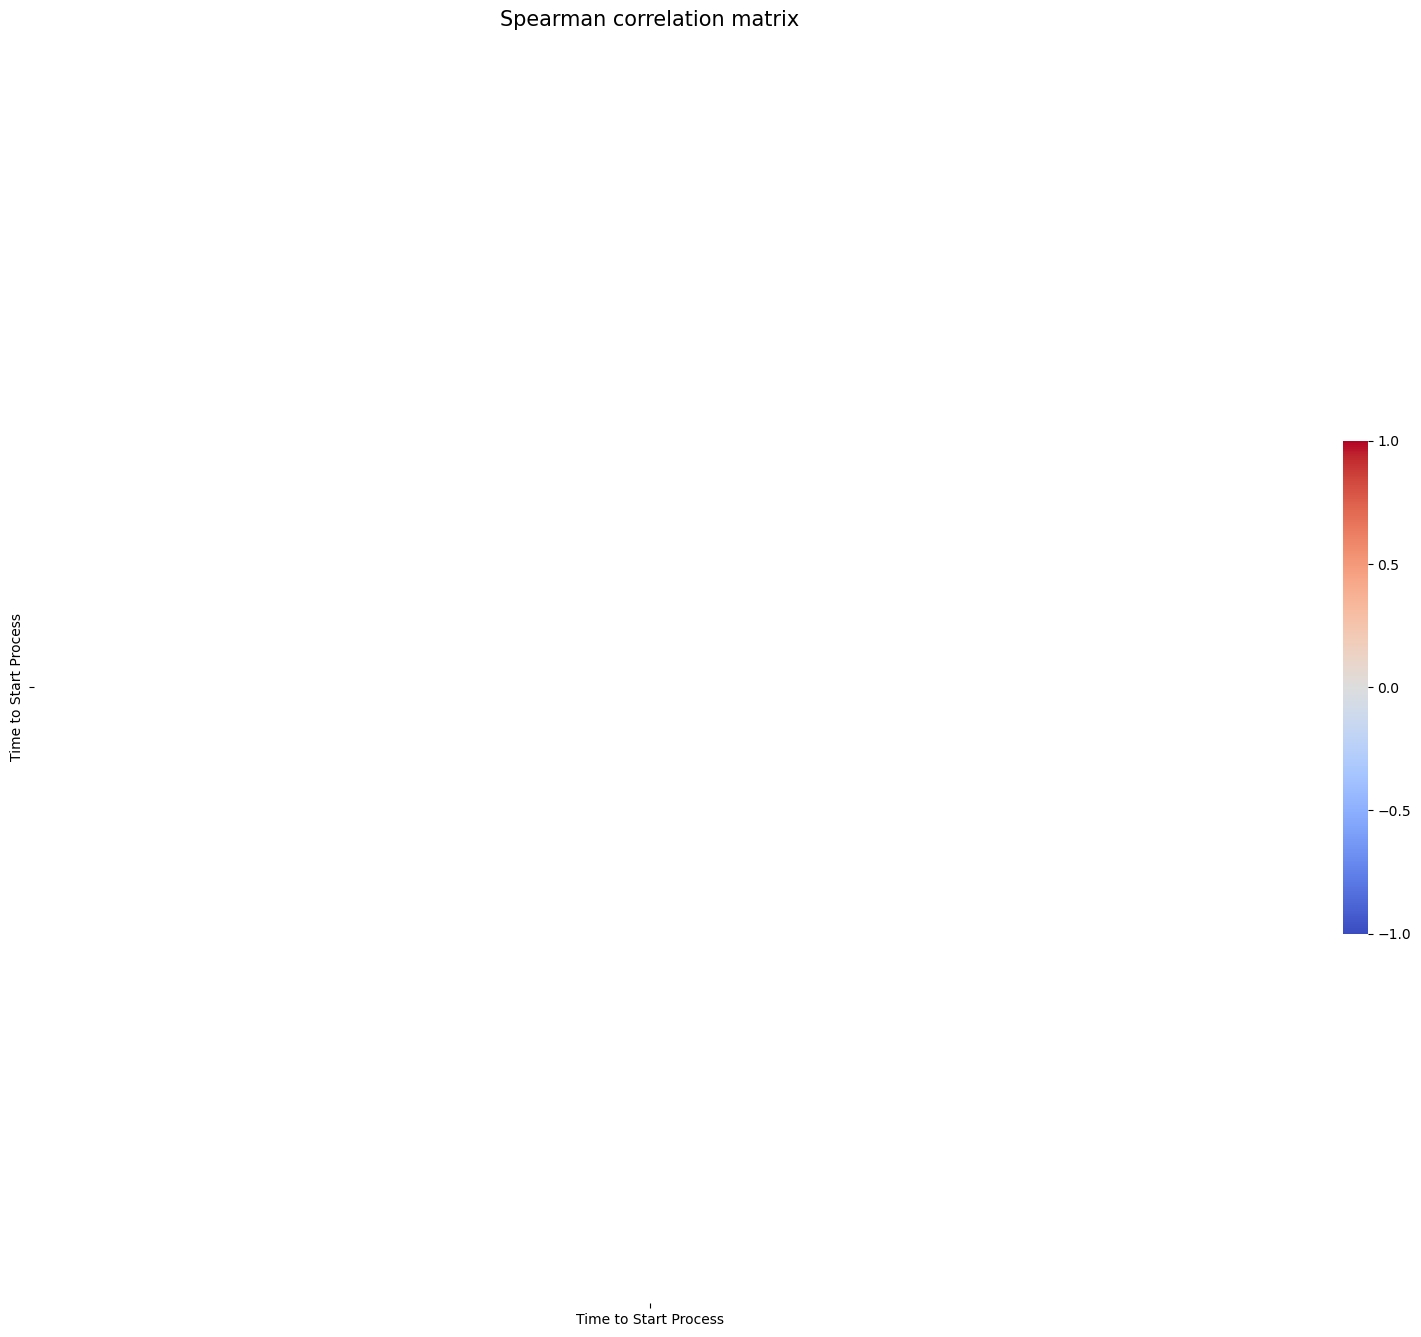



Spearman Correlation for prefix_2:


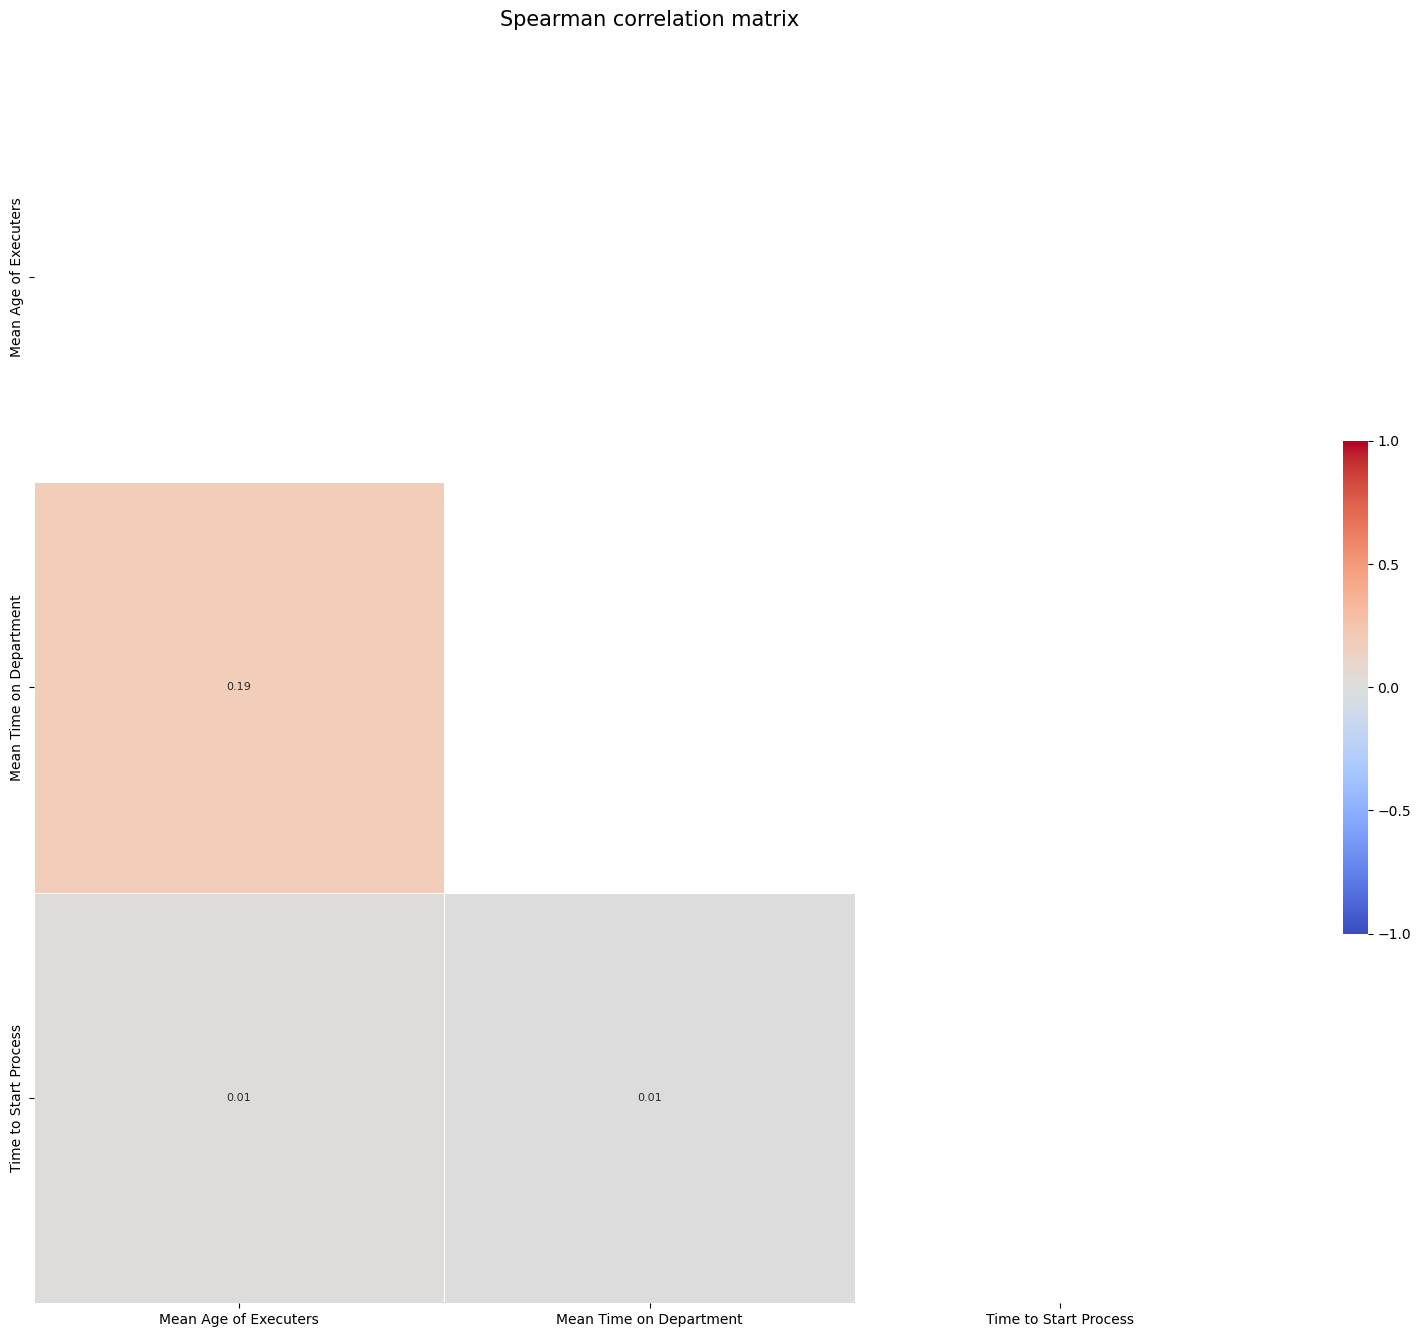



Spearman Correlation for prefix_3:


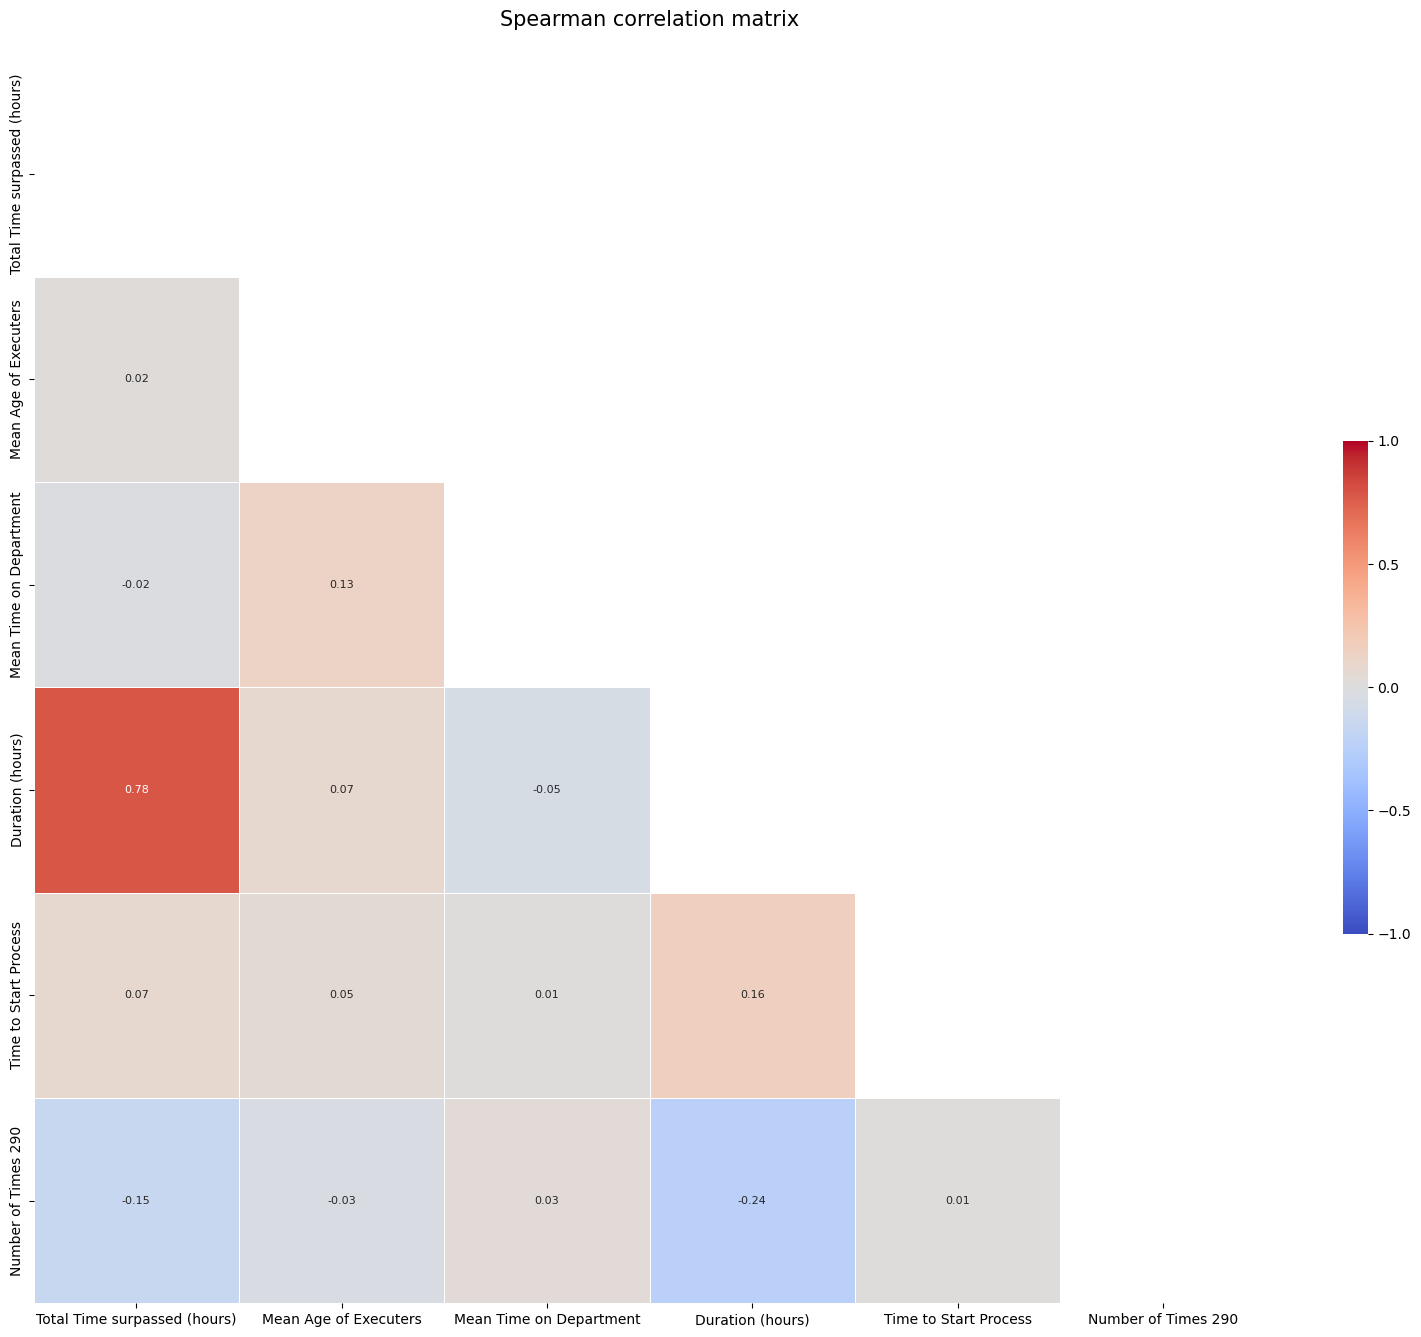



Spearman Correlation for prefix_4:


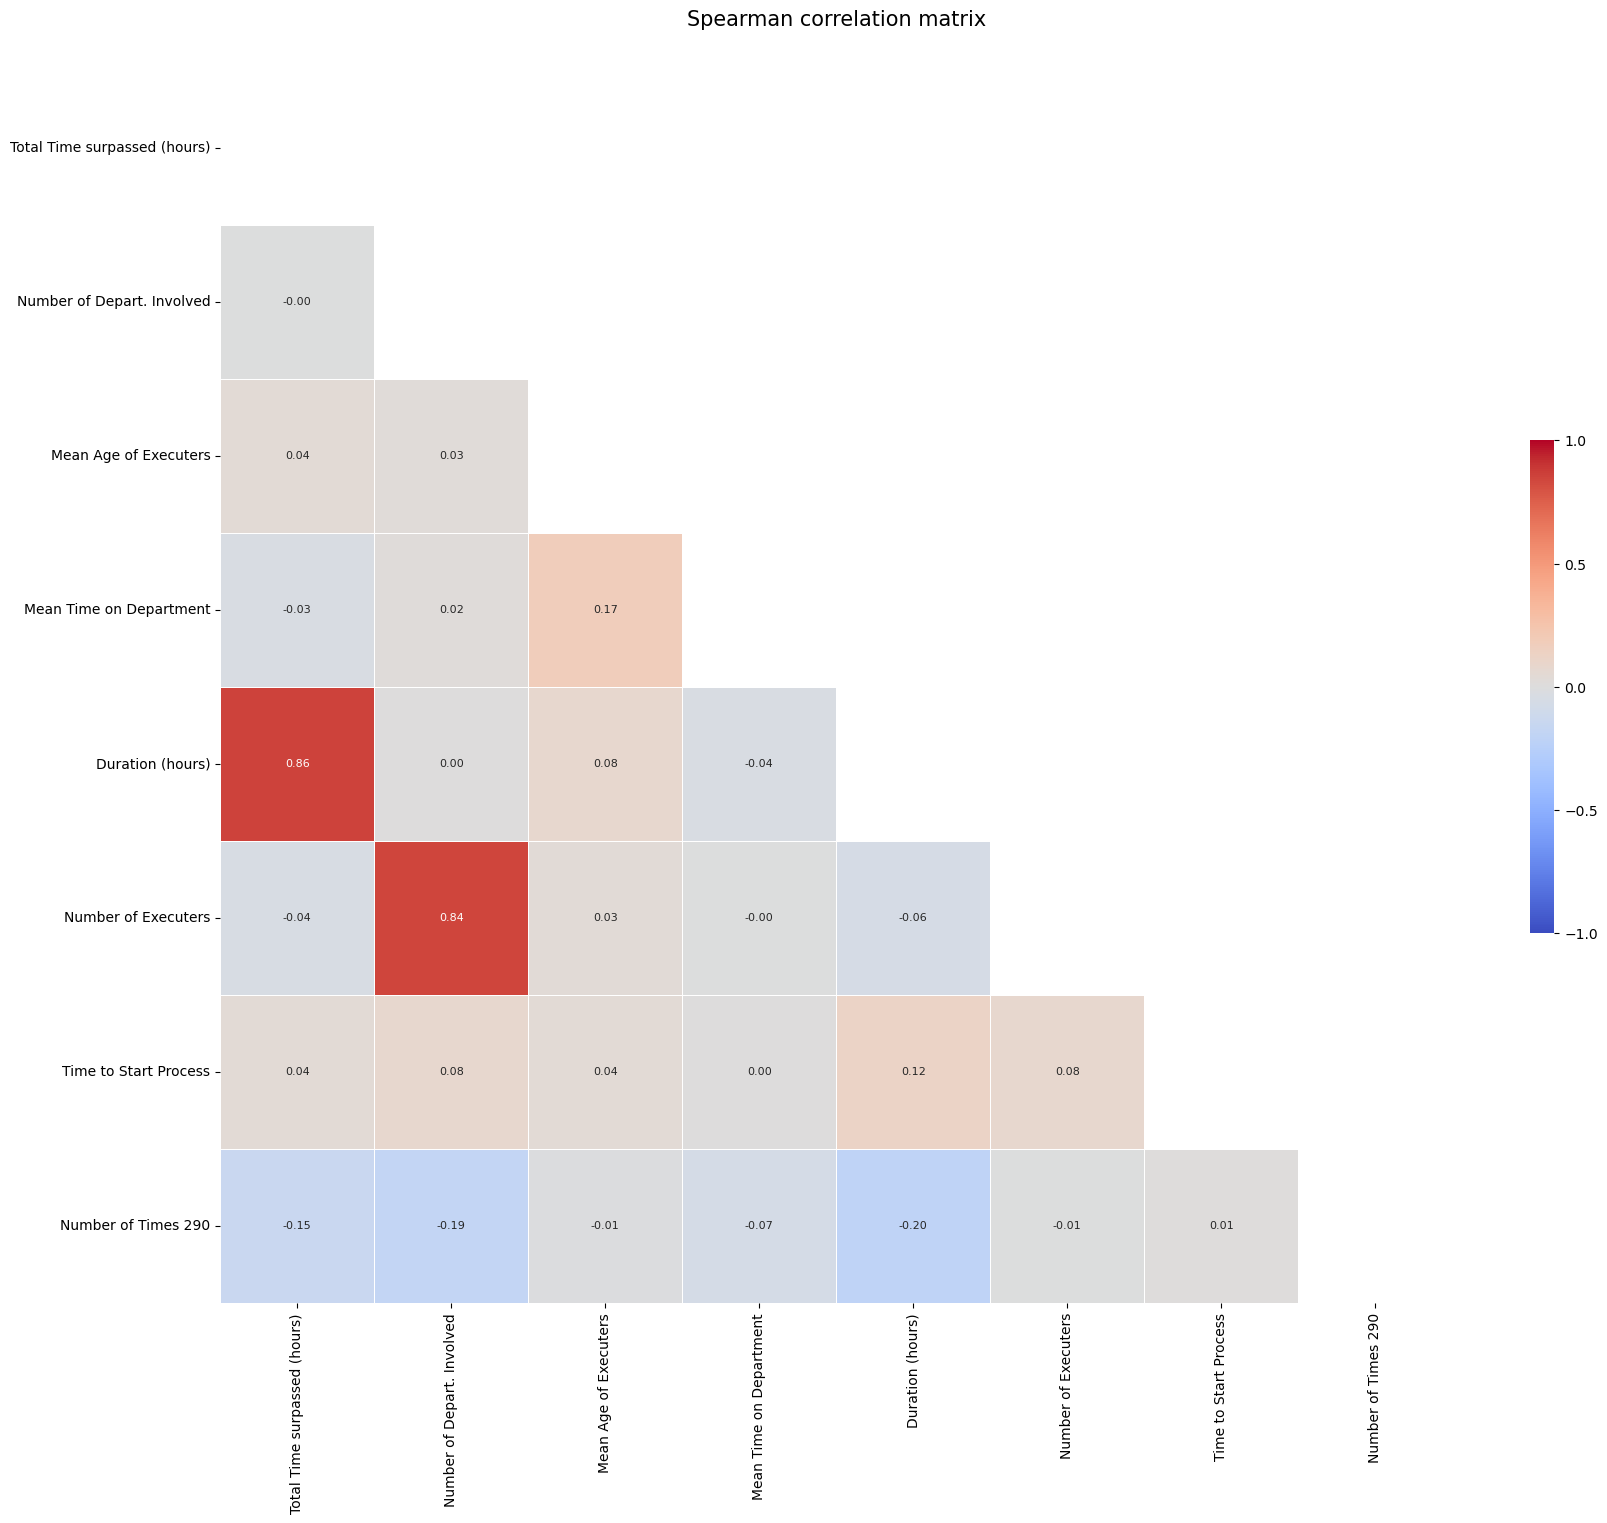



Spearman Correlation for prefix_5:


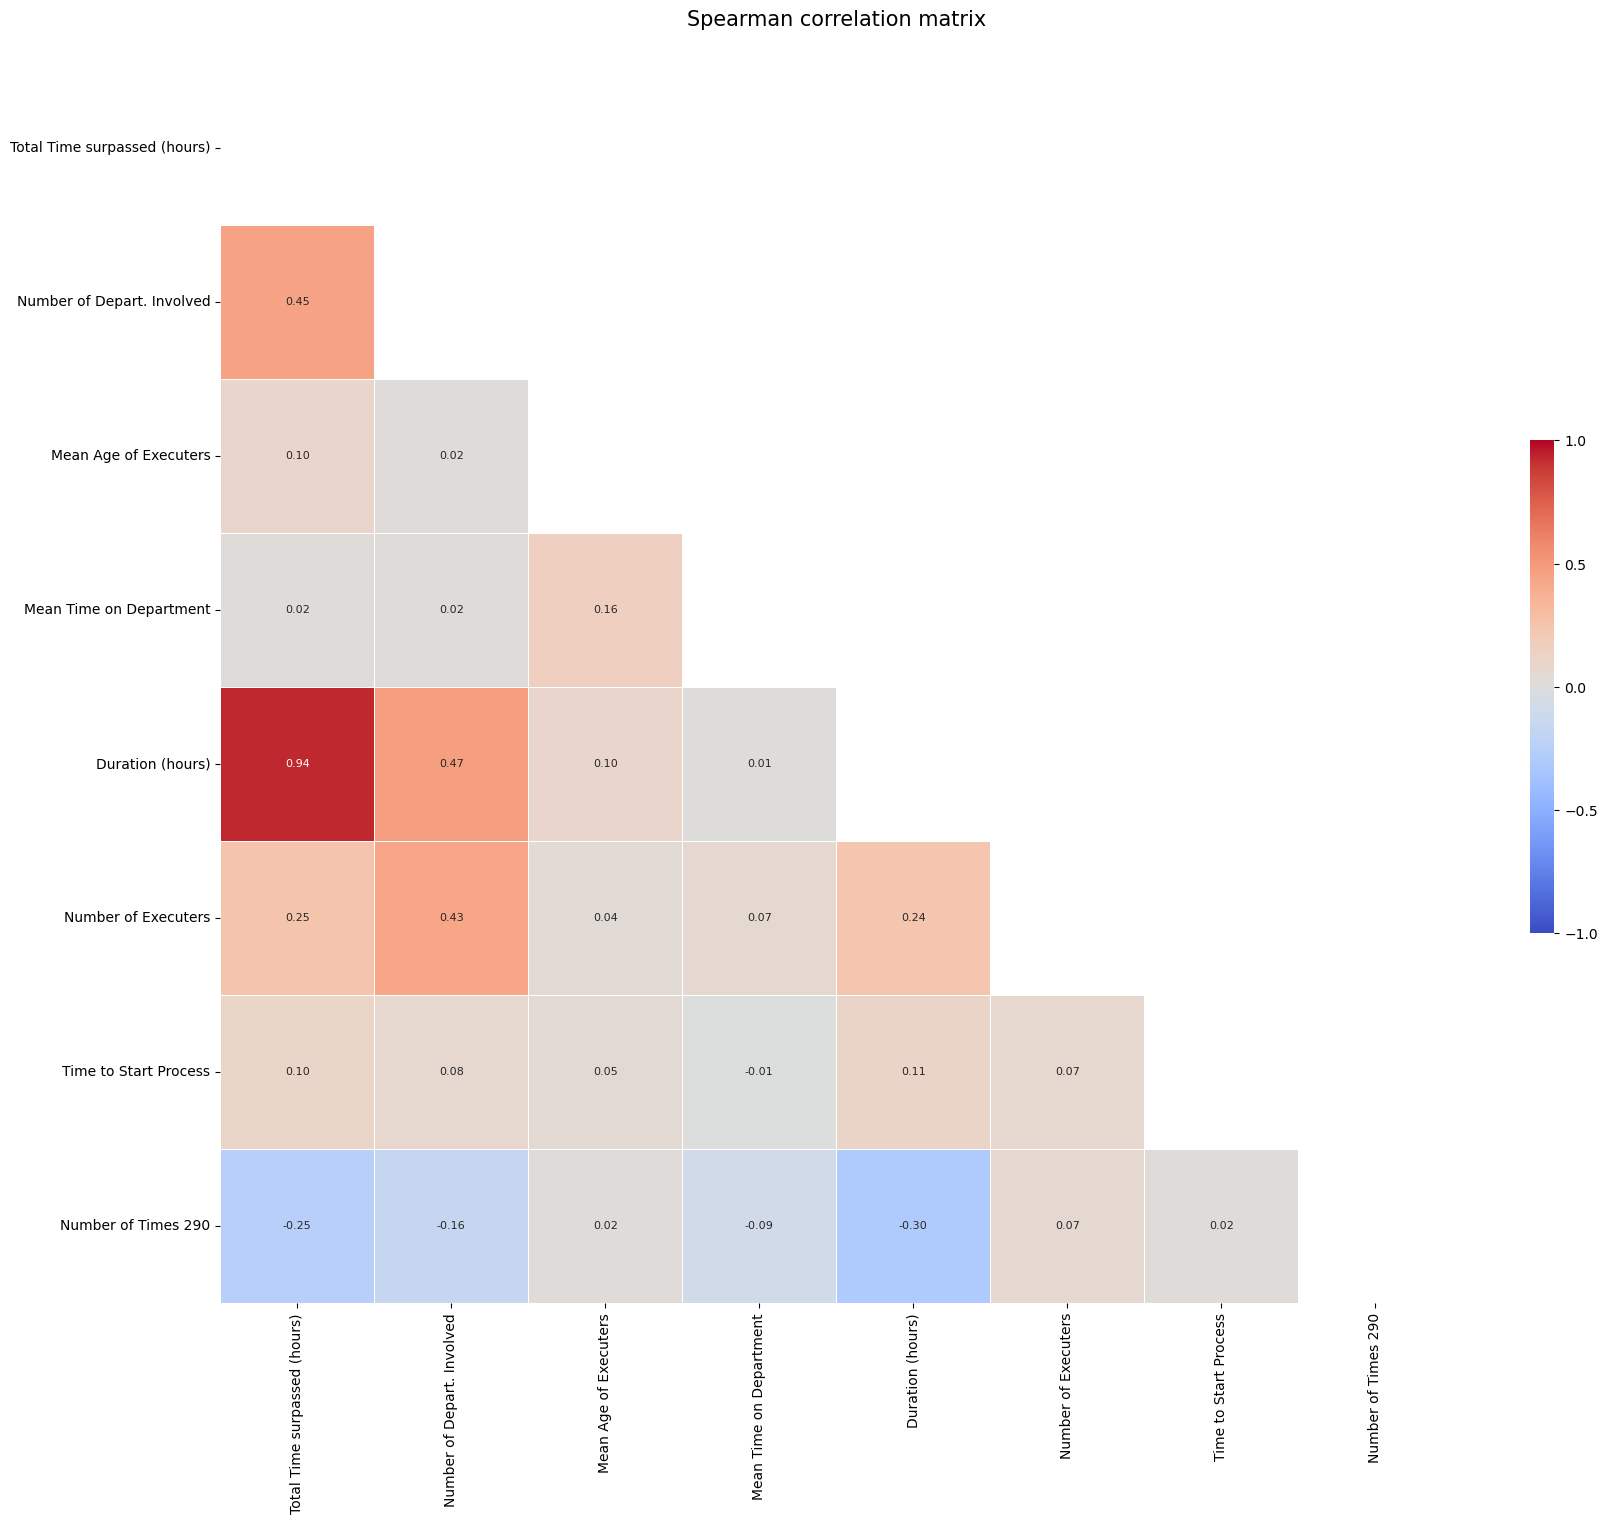



Spearman Correlation for prefix_6:


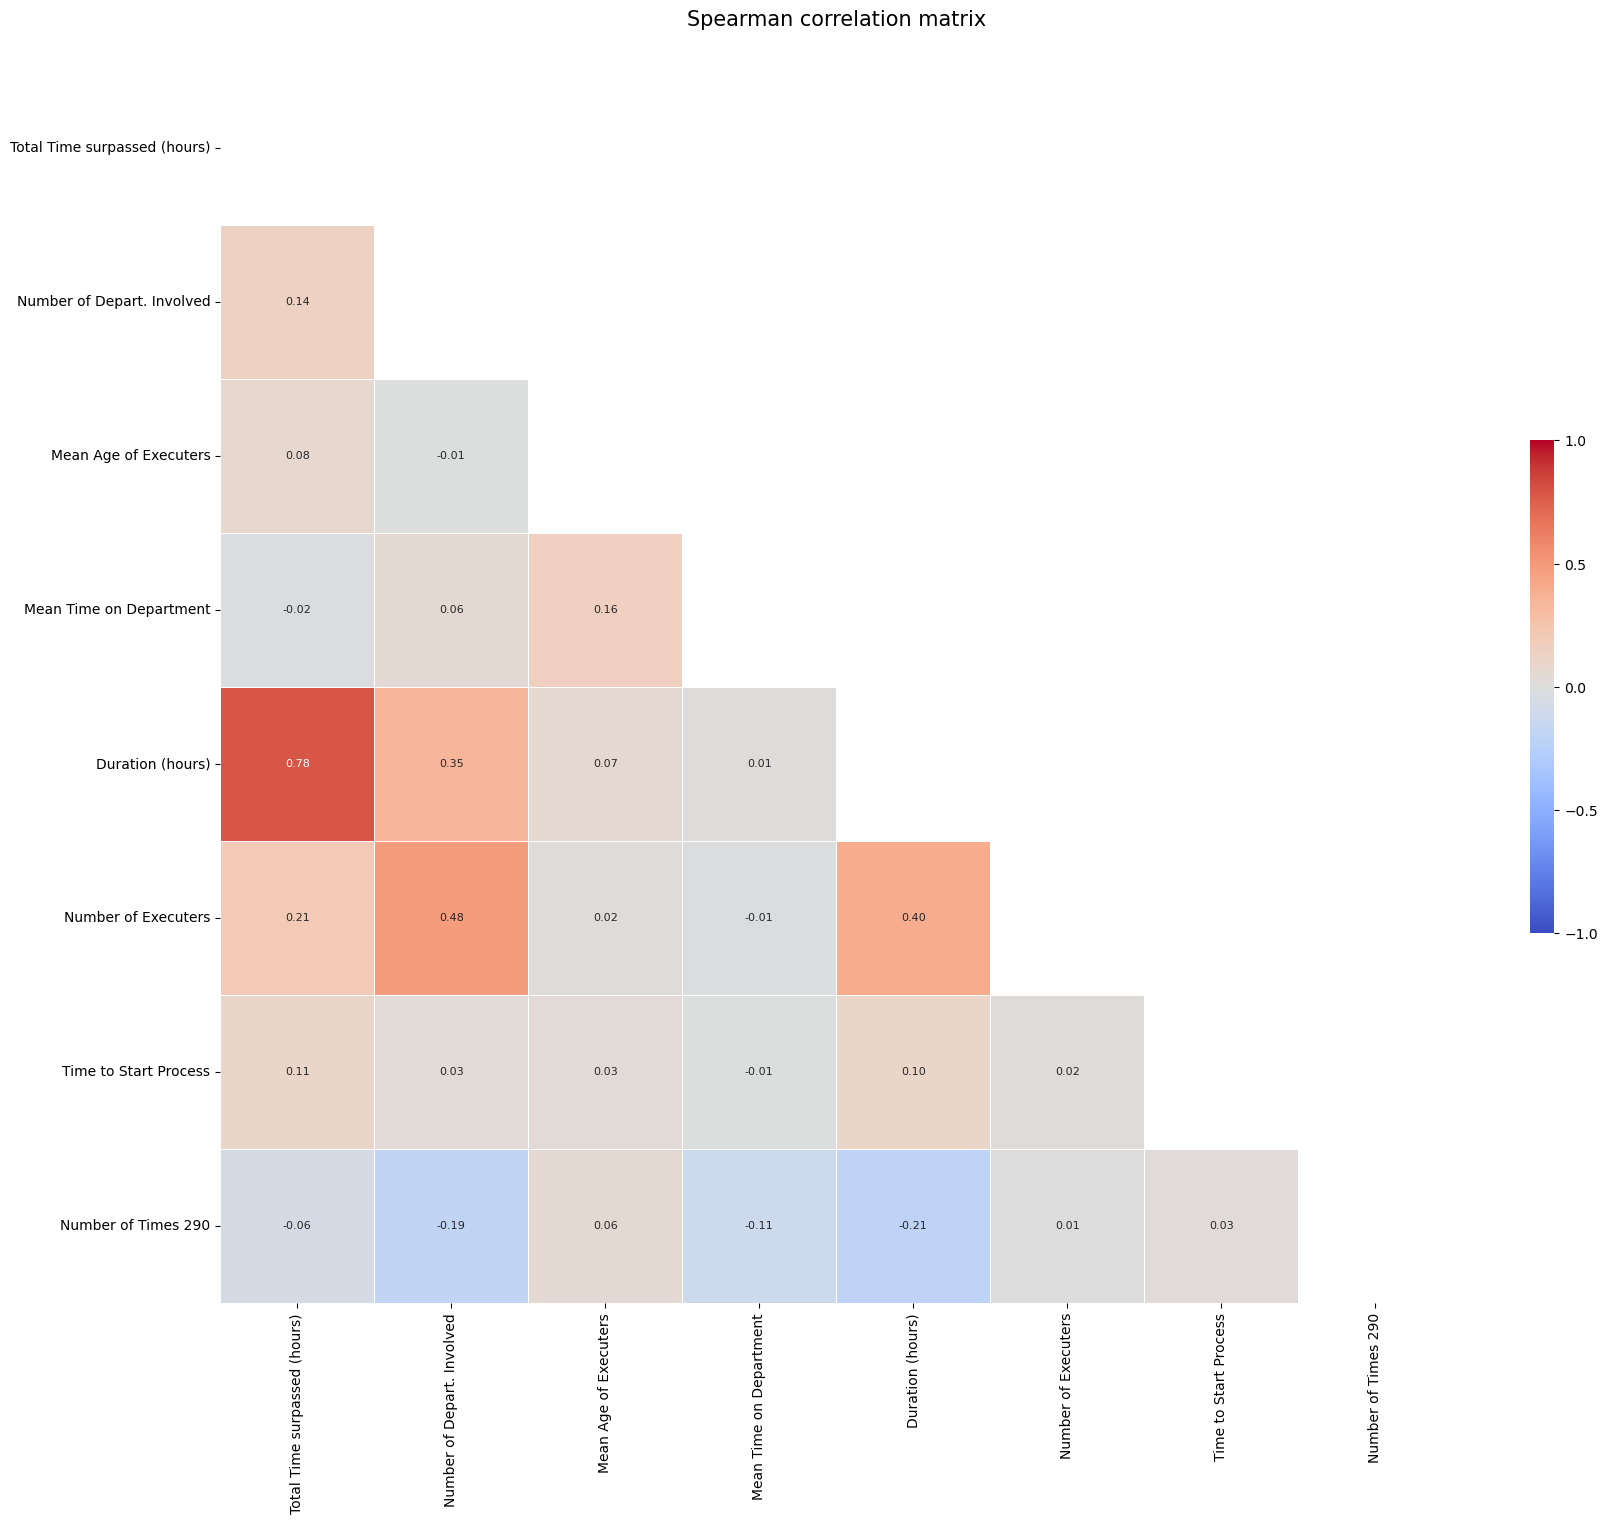



Spearman Correlation for prefix_7:


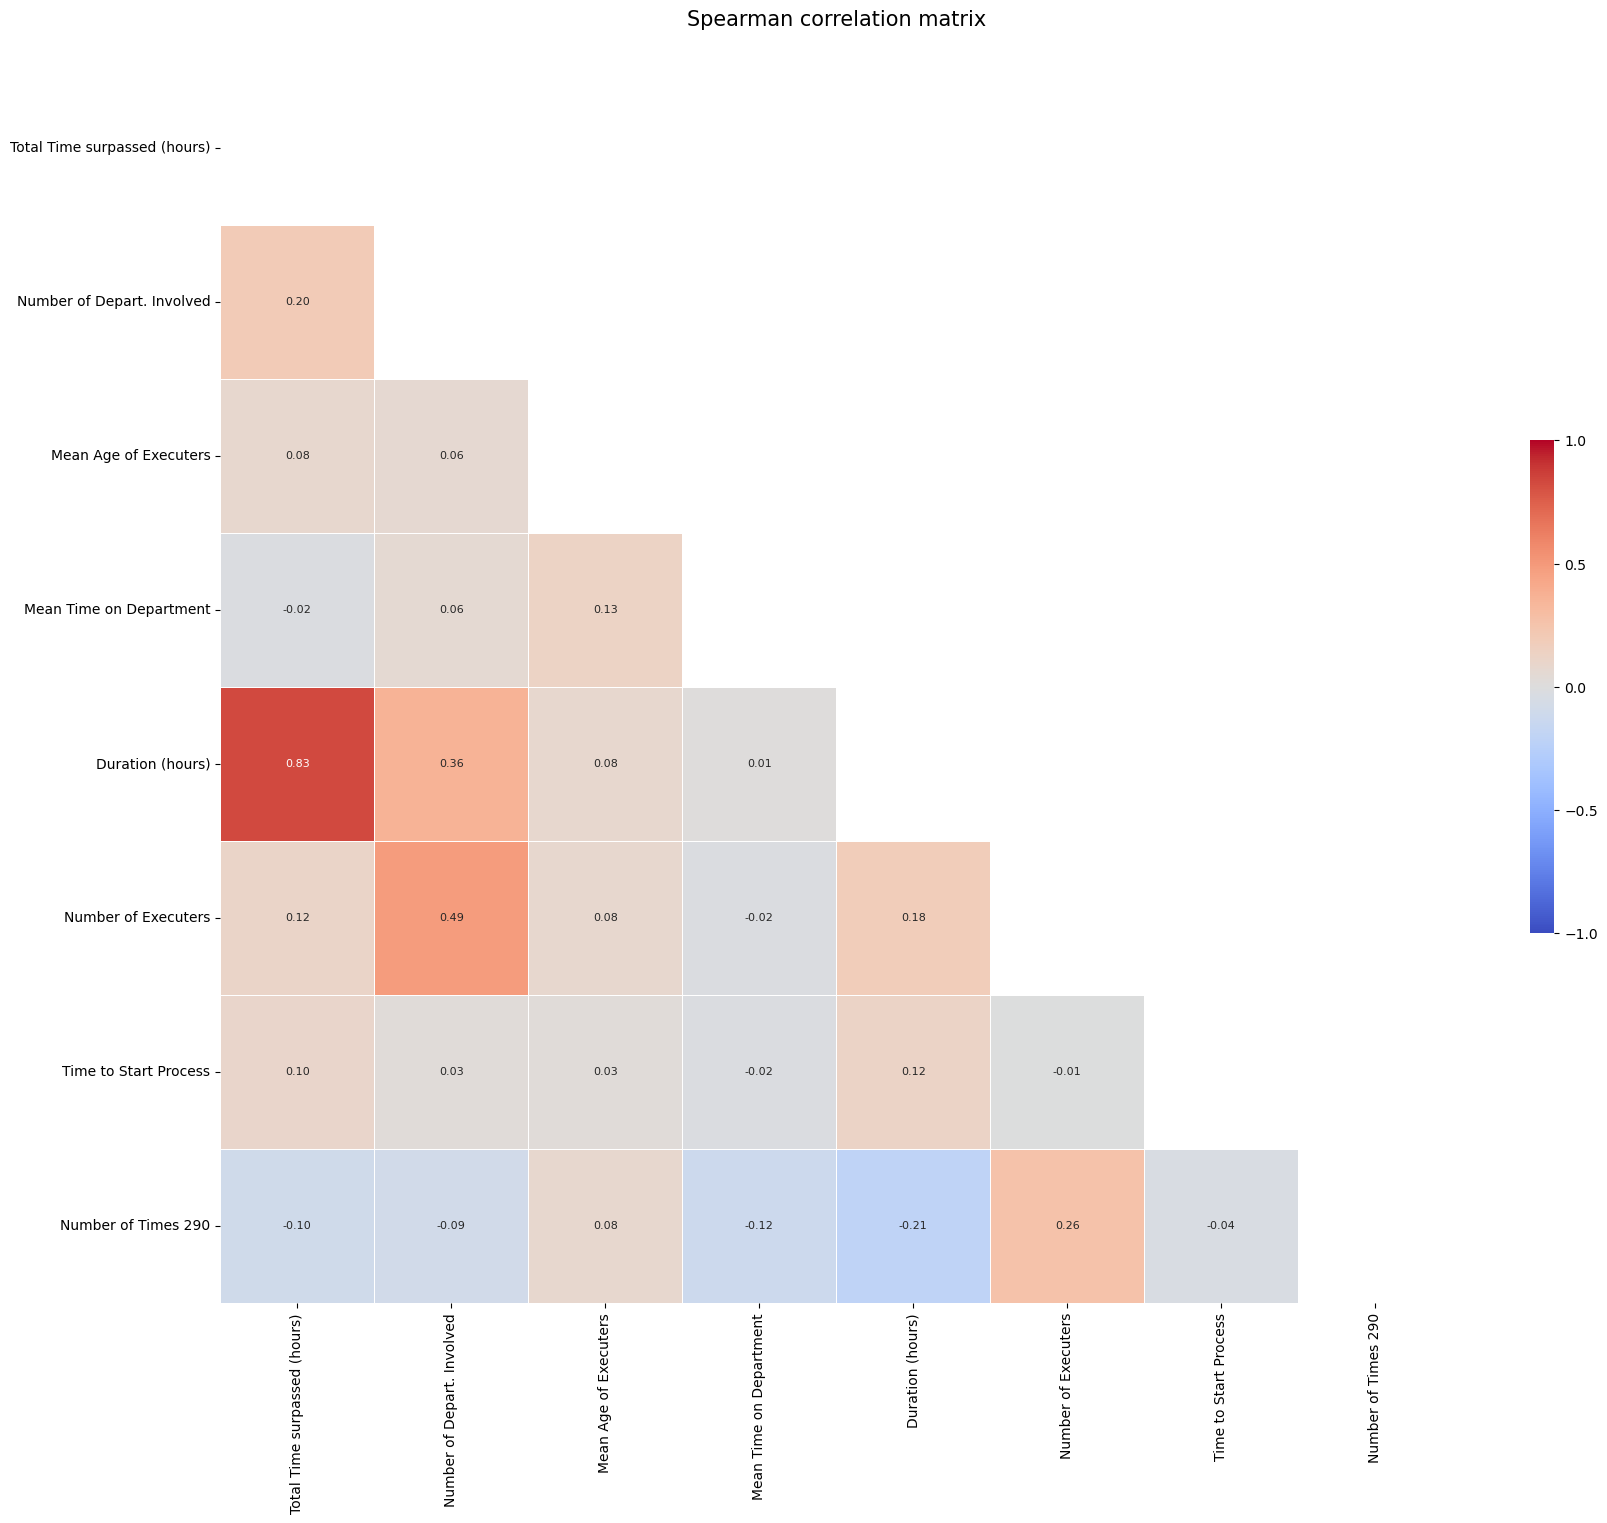



Spearman Correlation for prefix_8:


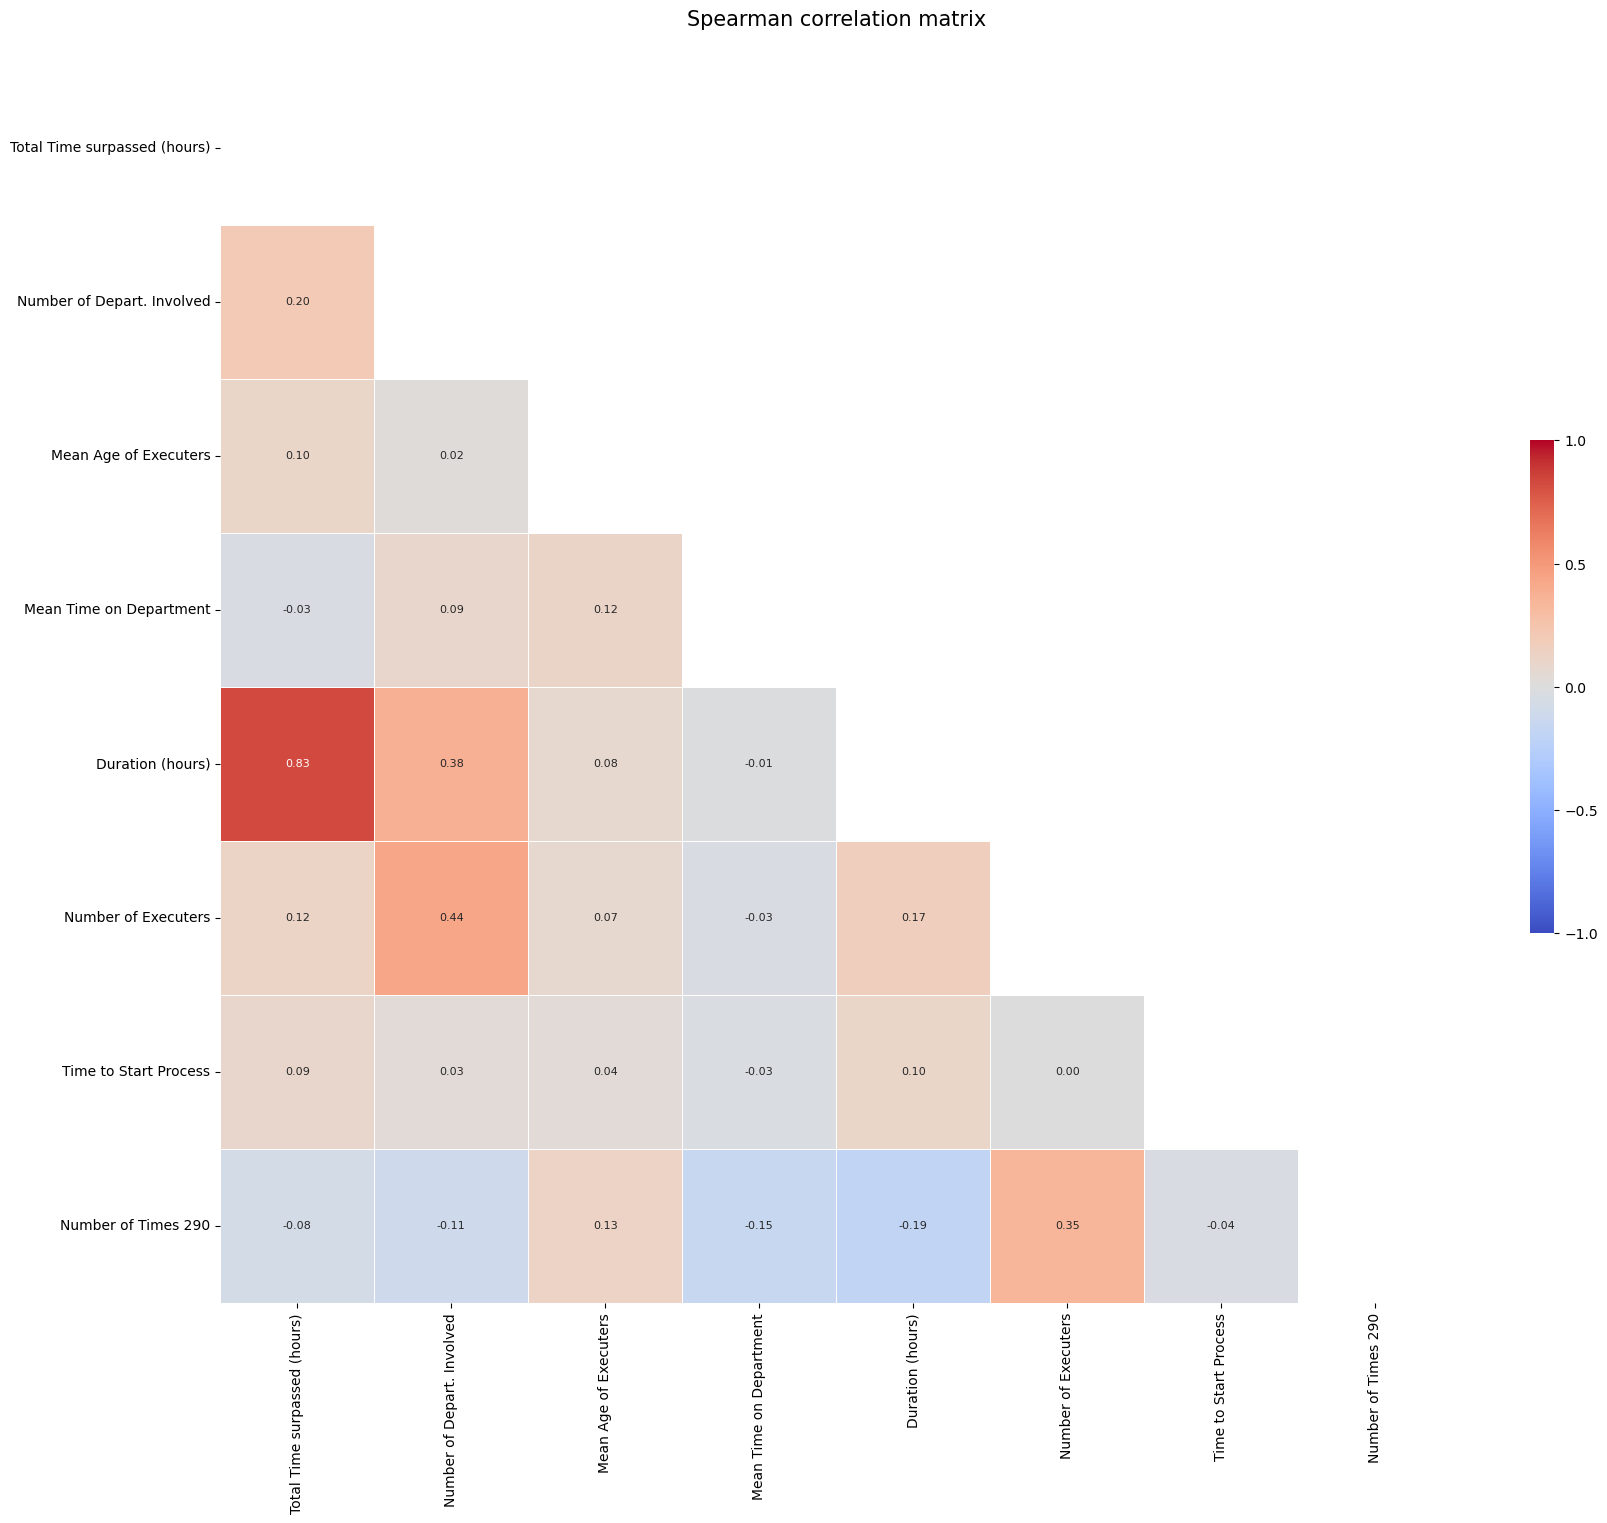

In [82]:
for name, dataset in datasets.items():
    print(colored(f"Spearman Correlation for {name}:", attrs=['bold']))
    cf.get_spearman_corr(dataset)
    print("\n" + "="*30 + "\n")

* Some maps are empty because only contains 1 numerical variable
* Although Spearman Correlation is not the best option to analyze categorical we can see a very hiigh correlation between "Surpassed Time" and "Duration" or other numerical data

*CRAMÉR'S V (cat-cat)*

We are looking for:
* variables with value close 0 with the Outcome, meaning small significance with it

In [83]:
for name, dataset in datasets.items():
    print(colored(f"\nCramér's V for {name}:", attrs=['bold']))
    # Assuming categorical_columns is a list of categorical column names
    for col in categorical_columns:
        if col not in dataset.columns:
            continue

        cramers_v_result = cf.get_cramers_v(dataset[col], dataset['Outcome'])

        # Printing variables with correlation below 0.1 with the target
        if cramers_v_result < 0.05:
            print(f"Cramér's V for {col} vs Outcome: {cramers_v_result:.4f}")


Cramér's V for prefix_1:
Cramér's V for Hour Task Arrival Moment vs Outcome: 0.0428
Cramér's V for ID_3486 vs Outcome: 0.0395

Cramér's V for prefix_2:
Cramér's V for Hour Task Arrival Moment vs Outcome: 0.0430
Cramér's V for ID_3486 vs Outcome: 0.0395

Cramér's V for prefix_3:
Cramér's V for ID_3486 vs Outcome: 0.0395

Cramér's V for prefix_4:
Cramér's V for Out-Sourced Involved vs Outcome: 0.0481
Cramér's V for ID_3486 vs Outcome: 0.0393

Cramér's V for prefix_5:
Cramér's V for Out-Sourced Involved vs Outcome: 0.0349
Cramér's V for ID_3486 vs Outcome: 0.0412

Cramér's V for prefix_6:
Cramér's V for ID_3935 vs Outcome: 0.0378

Cramér's V for prefix_7:
Cramér's V for Out-Sourced Involved vs Outcome: 0.0389
Cramér's V for ID_3486 vs Outcome: 0.0447

Cramér's V for prefix_8:


*ANOVA (cat-num)*

Where we are looking:
* for variables with high p-value with the outcome since means low significance with the target
* for variables with low p-value with each other meaning a high possibility of collinearity

In [84]:
# Perform ANOVA for each combination of numerical and categorical columns
for name, dataset in datasets.items():
    print(colored(f"ANOVA Correlation for {name}:", attrs=['bold'], color="green"))
    for num_col in numerical_columns:
        if num_col not in dataset.columns:
            continue  # Skip if the numerical column does not exist
        for cat_col in categorical_columns:
            if cat_col not in dataset.columns:
                continue  # Skip if the categorical column does not exist
            anova_result = cf.get_anova(dataset, cat_col, num_col)
            p_value = anova_result.pvalue
            if cat_col == "Outcome" or p_value < 0.05:
                print(colored(f"ANOVA for {num_col} with {cat_col}:", attrs=['bold']))
                print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {p_value:.4f}")
                print("\n" + "="*30 + "\n")

ANOVA Correlation for prefix_1:
ANOVA for Time to Start Process with Hour Task Arrival Moment:
F-statistic: 11.8562, p-value: 0.0000


ANOVA for Time to Start Process with Month Task Arrival Moment:
F-statistic: 1.8929, p-value: 0.0353


ANOVA for Time to Start Process with ID_47:
F-statistic: 3.4611, p-value: 0.0078


ANOVA for Time to Start Process with ID_1602:
F-statistic: 3.6333, p-value: 0.0058


ANOVA for Time to Start Process with ID_3388:
F-statistic: 9.2630, p-value: 0.0000


ANOVA for Time to Start Process with ID_3390:
F-statistic: 24.6986, p-value: 0.0000


ANOVA for Time to Start Process with ID_3391:
F-statistic: 30.3950, p-value: 0.0000


ANOVA for Time to Start Process with ID_3420:
F-statistic: 17.9694, p-value: 0.0000


ANOVA for Time to Start Process with ID_3486:
F-statistic: 94.9604, p-value: 0.0000


ANOVA for Time to Start Process with ID_3491:
F-statistic: 59.3143, p-value: 0.0000


ANOVA for Time to Start Process with ID_3935:
F-statistic: 48.1857, p-value: 0.

ANOVA for Mean Time on Department with ID_3391:
F-statistic: 57.0581, p-value: 0.0000


ANOVA for Mean Time on Department with ID_3420:
F-statistic: 22.7765, p-value: 0.0000


ANOVA for Mean Time on Department with ID_3486:
F-statistic: 4.7747, p-value: 0.0008


ANOVA for Mean Time on Department with ID_3935:
F-statistic: 16.1084, p-value: 0.0000


ANOVA for Mean Time on Department with Executer_1:
F-statistic: 161.0349, p-value: 0.0000


ANOVA for Mean Time on Department with Executer_2:
F-statistic: 44.6738, p-value: 0.0000


ANOVA for Mean Time on Department with Outcome:
F-statistic: 24.2091, p-value: 0.0000


ANOVA for Duration (hours) with Out-Sourced Involved:
F-statistic: 185.7483, p-value: 0.0000


ANOVA for Duration (hours) with Hour Task Arrival Moment:
F-statistic: 35.4413, p-value: 0.0000


ANOVA for Duration (hours) with Month Task Arrival Moment:
F-statistic: 276.3180, p-value: 0.0000


ANOVA for Duration (hours) with W/ BPM Requirements:
F-statistic: 8.4880, p-value: 0.

ANOVA for Number of Executers with W/ BPM Requirements:
F-statistic: 2339.8473, p-value: 0.0000


ANOVA for Number of Executers with Activity_2:
F-statistic: 301.5129, p-value: 0.0000


ANOVA for Number of Executers with Activity_3:
F-statistic: 12333.7564, p-value: 0.0000


ANOVA for Number of Executers with Action_2:
F-statistic: 12369.5879, p-value: 0.0000


ANOVA for Number of Executers with Action_3:
F-statistic: 5148.3372, p-value: 0.0000


ANOVA for Number of Executers with ID_47:
F-statistic: 75.3472, p-value: 0.0000


ANOVA for Number of Executers with ID_1602:
F-statistic: 67.5971, p-value: 0.0000


ANOVA for Number of Executers with ID_1604:
F-statistic: 26.9015, p-value: 0.0000


ANOVA for Number of Executers with ID_3388:
F-statistic: 46.3182, p-value: 0.0000


ANOVA for Number of Executers with ID_3390:
F-statistic: 577.7533, p-value: 0.0000


ANOVA for Number of Executers with ID_3391:
F-statistic: 4395.1421, p-value: 0.0000


ANOVA for Number of Executers with ID_3420:


ANOVA for Time to Start Process with Action_3:
F-statistic: 20.2674, p-value: 0.0000


ANOVA for Time to Start Process with ID_47:
F-statistic: 3.4937, p-value: 0.0074


ANOVA for Time to Start Process with ID_1602:
F-statistic: 3.6670, p-value: 0.0054


ANOVA for Time to Start Process with ID_3388:
F-statistic: 9.2964, p-value: 0.0000


ANOVA for Time to Start Process with ID_3390:
F-statistic: 24.5862, p-value: 0.0000


ANOVA for Time to Start Process with ID_3391:
F-statistic: 32.1540, p-value: 0.0000


ANOVA for Time to Start Process with ID_3420:
F-statistic: 17.9893, p-value: 0.0000


ANOVA for Time to Start Process with ID_3486:
F-statistic: 94.8047, p-value: 0.0000


ANOVA for Time to Start Process with ID_3491:
F-statistic: 59.0779, p-value: 0.0000


ANOVA for Time to Start Process with ID_3935:
F-statistic: 48.3651, p-value: 0.0000


ANOVA for Time to Start Process with Executer_1:
F-statistic: 9.4978, p-value: 0.0000


ANOVA for Time to Start Process with Executer_2:
F-stati

ANOVA for Mean Time on Department with ID_47:
F-statistic: 54.5098, p-value: 0.0000


ANOVA for Mean Time on Department with ID_1602:
F-statistic: 54.1769, p-value: 0.0000


ANOVA for Mean Time on Department with ID_1604:
F-statistic: 16.8765, p-value: 0.0000


ANOVA for Mean Time on Department with ID_3388:
F-statistic: 24.9828, p-value: 0.0000


ANOVA for Mean Time on Department with ID_3390:
F-statistic: 27.2184, p-value: 0.0000


ANOVA for Mean Time on Department with ID_3391:
F-statistic: 23.8111, p-value: 0.0000


ANOVA for Mean Time on Department with ID_3420:
F-statistic: 23.7507, p-value: 0.0000


ANOVA for Mean Time on Department with ID_3486:
F-statistic: 8.4225, p-value: 0.0000


ANOVA for Mean Time on Department with ID_3491:
F-statistic: 9.3055, p-value: 0.0000


ANOVA for Mean Time on Department with ID_3935:
F-statistic: 11.7697, p-value: 0.0000


ANOVA for Mean Time on Department with Executer_1:
F-statistic: 78.5657, p-value: 0.0000


ANOVA for Mean Time on Department

ANOVA for Total Time surpassed (hours) with Activity_2:
F-statistic: 9.1840, p-value: 0.0024


ANOVA for Total Time surpassed (hours) with Activity_3:
F-statistic: 294.6961, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Activity_4:
F-statistic: 415.1638, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Activity_5:
F-statistic: 806.8343, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Action_2:
F-statistic: 353.5072, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Action_3:
F-statistic: 123.0166, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Action_4:
F-statistic: 355.5278, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Action_5:
F-statistic: 2518.4066, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with ID_47:
F-statistic: 50.4680, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with ID_1602:
F-statistic: 47.8549, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with ID_16

ANOVA for Mean Time on Department with Executer_4:
F-statistic: 35.9053, p-value: 0.0000


ANOVA for Mean Time on Department with Executer_5:
F-statistic: 19.0067, p-value: 0.0000


ANOVA for Mean Time on Department with Outcome:
F-statistic: 40.6167, p-value: 0.0000


ANOVA for Duration (hours) with Out-Sourced Involved:
F-statistic: 11.7429, p-value: 0.0006


ANOVA for Duration (hours) with Hour Task Arrival Moment:
F-statistic: 18.5618, p-value: 0.0000


ANOVA for Duration (hours) with Month Task Arrival Moment:
F-statistic: 23.6436, p-value: 0.0000


ANOVA for Duration (hours) with W/ BPM Requirements:
F-statistic: 96.6434, p-value: 0.0000


ANOVA for Duration (hours) with Activity_2:
F-statistic: 9.0067, p-value: 0.0027


ANOVA for Duration (hours) with Activity_3:
F-statistic: 372.1590, p-value: 0.0000


ANOVA for Duration (hours) with Activity_4:
F-statistic: 480.0461, p-value: 0.0000


ANOVA for Duration (hours) with Activity_5:
F-statistic: 808.2679, p-value: 0.0000


ANOVA fo

ANOVA for Total Time surpassed (hours) with Executer_1:
F-statistic: 2.2389, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Executer_2:
F-statistic: 18.1735, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Executer_3:
F-statistic: 3.7595, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Executer_4:
F-statistic: 1.7132, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Executer_5:
F-statistic: 2.0676, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Executer_6:
F-statistic: 5.2100, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Outcome:
F-statistic: 851.6898, p-value: 0.0000


ANOVA for Number of Executers with Out-Sourced Involved:
F-statistic: 182.6017, p-value: 0.0000


ANOVA for Number of Executers with Hour Task Arrival Moment:
F-statistic: 1.7753, p-value: 0.0126


ANOVA for Number of Executers with Month Task Arrival Moment:
F-statistic: 10.7434, p-value: 0.0000


ANOVA for Number of Executers with 

ANOVA for Mean Time on Department with Executer_5:
F-statistic: 6.2626, p-value: 0.0000


ANOVA for Mean Time on Department with Executer_6:
F-statistic: 5.9613, p-value: 0.0000


ANOVA for Mean Time on Department with Outcome:
F-statistic: 4.8780, p-value: 0.0022


ANOVA for Duration (hours) with Hour Task Arrival Moment:
F-statistic: 5.8902, p-value: 0.0000


ANOVA for Duration (hours) with Month Task Arrival Moment:
F-statistic: 25.1145, p-value: 0.0000


ANOVA for Duration (hours) with W/ BPM Requirements:
F-statistic: 105.5507, p-value: 0.0000


ANOVA for Duration (hours) with Activity_3:
F-statistic: 41.5169, p-value: 0.0000


ANOVA for Duration (hours) with Activity_4:
F-statistic: 51.2666, p-value: 0.0000


ANOVA for Duration (hours) with Activity_5:
F-statistic: 198.5789, p-value: 0.0000


ANOVA for Duration (hours) with Activity_6:
F-statistic: 205.3798, p-value: 0.0000


ANOVA for Duration (hours) with Action_2:
F-statistic: 41.4821, p-value: 0.0000


ANOVA for Duration (hou

ANOVA for Total Time surpassed (hours) with Executer_5:
F-statistic: 1.1555, p-value: 0.0229


ANOVA for Total Time surpassed (hours) with Executer_6:
F-statistic: 1.5835, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Executer_7:
F-statistic: 2.9655, p-value: 0.0000


ANOVA for Total Time surpassed (hours) with Outcome:
F-statistic: 550.0336, p-value: 0.0000


ANOVA for Number of Executers with Out-Sourced Involved:
F-statistic: 109.9737, p-value: 0.0000


ANOVA for Number of Executers with Hour Task Arrival Moment:
F-statistic: 1.6251, p-value: 0.0304


ANOVA for Number of Executers with Month Task Arrival Moment:
F-statistic: 11.5291, p-value: 0.0000


ANOVA for Number of Executers with W/ BPM Requirements:
F-statistic: 324.9275, p-value: 0.0000


ANOVA for Number of Executers with Activity_2:
F-statistic: 13.6795, p-value: 0.0002


ANOVA for Number of Executers with Activity_3:
F-statistic: 120.6662, p-value: 0.0000


ANOVA for Number of Executers with Activity_4:
F-

ANOVA for Duration (hours) with Executer_4:
F-statistic: 2.9887, p-value: 0.0000


ANOVA for Duration (hours) with Executer_6:
F-statistic: 1.3252, p-value: 0.0000


ANOVA for Duration (hours) with Executer_7:
F-statistic: 3.1325, p-value: 0.0000


ANOVA for Duration (hours) with Outcome:
F-statistic: 555.4535, p-value: 0.0000


ANOVA for Time to Start Process with W/ BPM Requirements:
F-statistic: 13.1516, p-value: 0.0003


ANOVA for Time to Start Process with Activity_2:
F-statistic: 6.7101, p-value: 0.0096


ANOVA for Time to Start Process with Activity_5:
F-statistic: 2.2557, p-value: 0.0356


ANOVA for Time to Start Process with Activity_6:
F-statistic: 3.5511, p-value: 0.0017


ANOVA for Time to Start Process with Activity_7:
F-statistic: 4.2294, p-value: 0.0001


ANOVA for Time to Start Process with Action_5:
F-statistic: 2.4122, p-value: 0.0074


ANOVA for Time to Start Process with Action_6:
F-statistic: 6.6453, p-value: 0.0000


ANOVA for Time to Start Process with Action_7:


* Time to Start is present in every combination of high importance to other and the target, which suggests that might be some collinearity within this and other variables

*MODEL IMPORTANCE*

Dataset: prefix_1


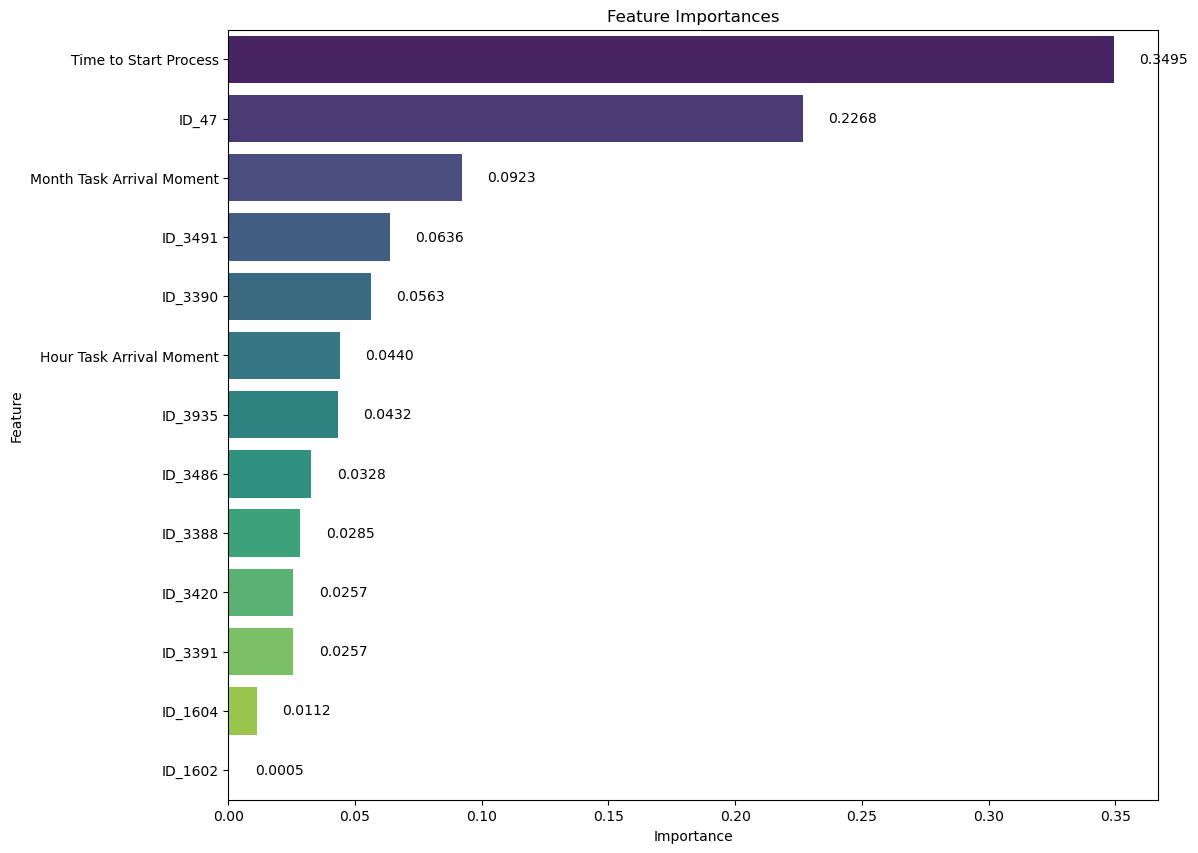

Dataset: prefix_2


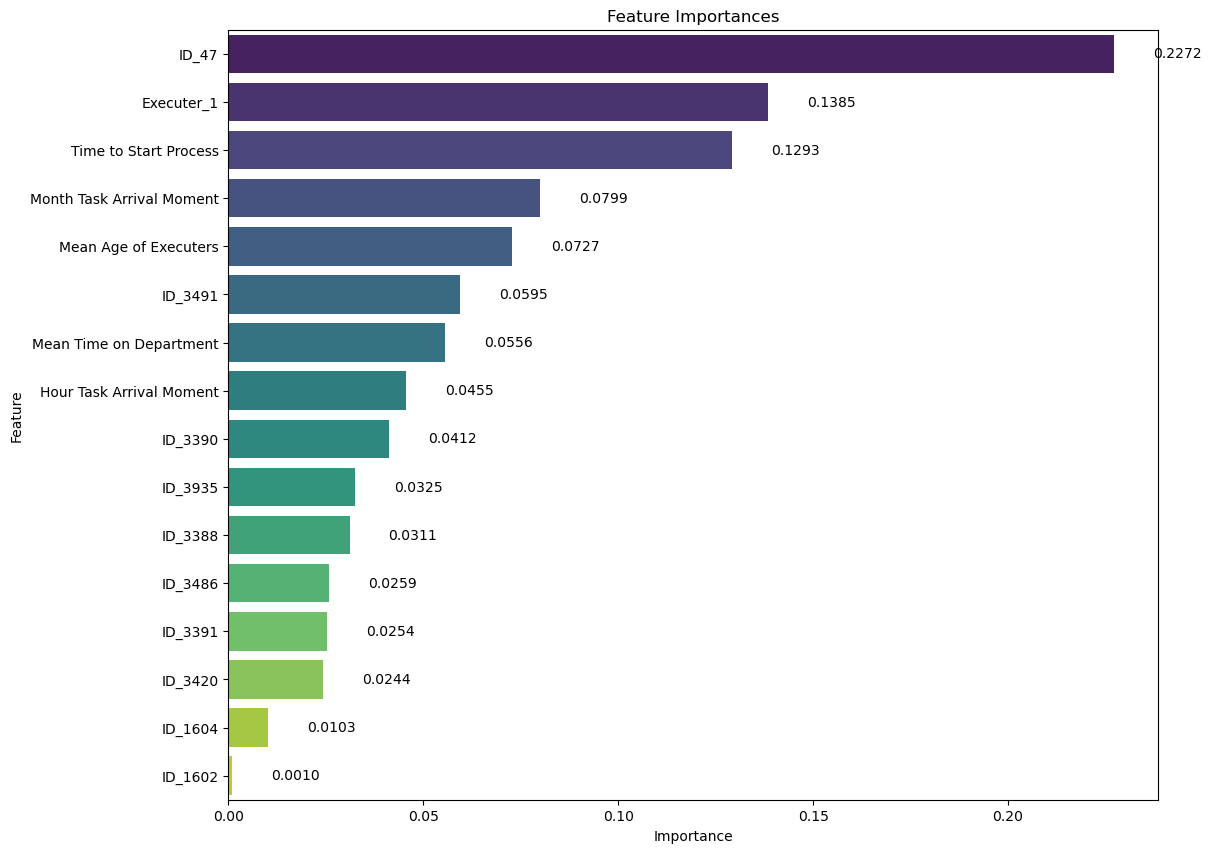

Dataset: prefix_3


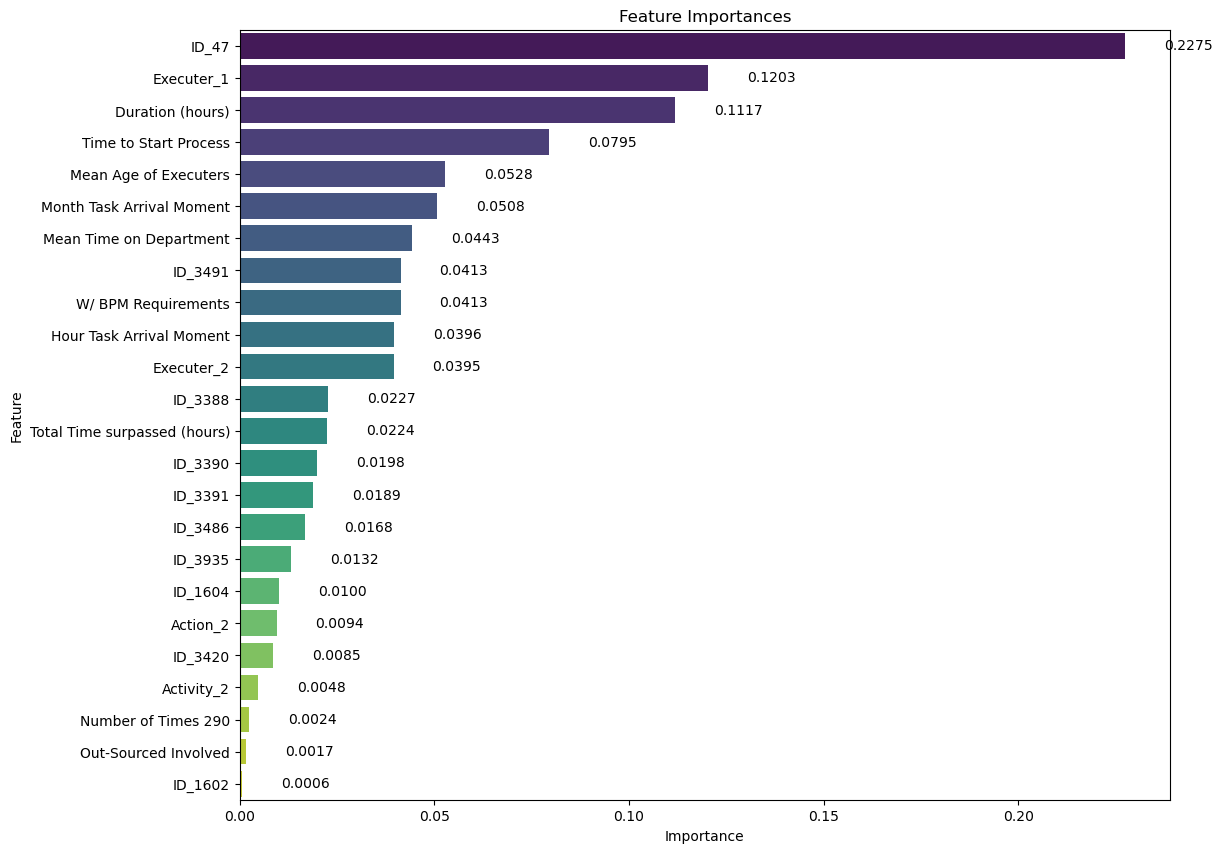

Dataset: prefix_4


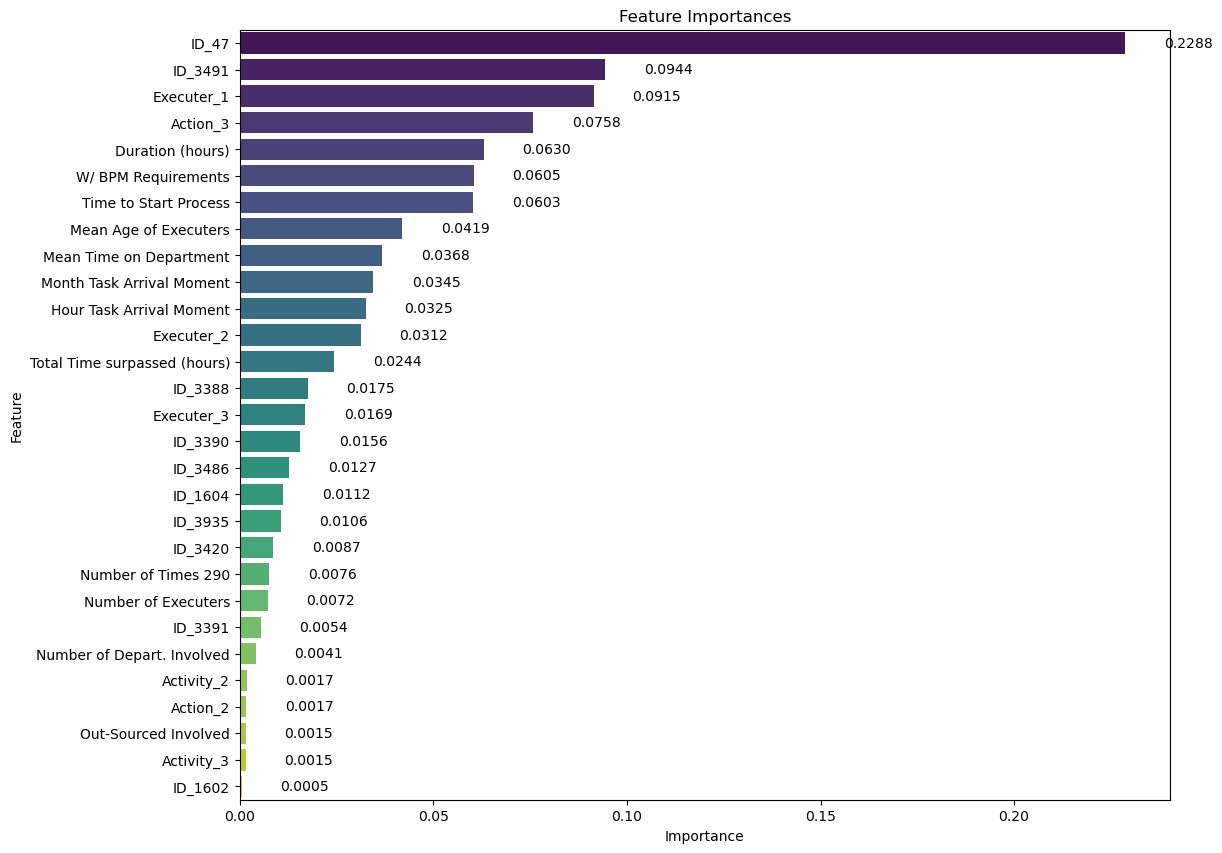

Dataset: prefix_5


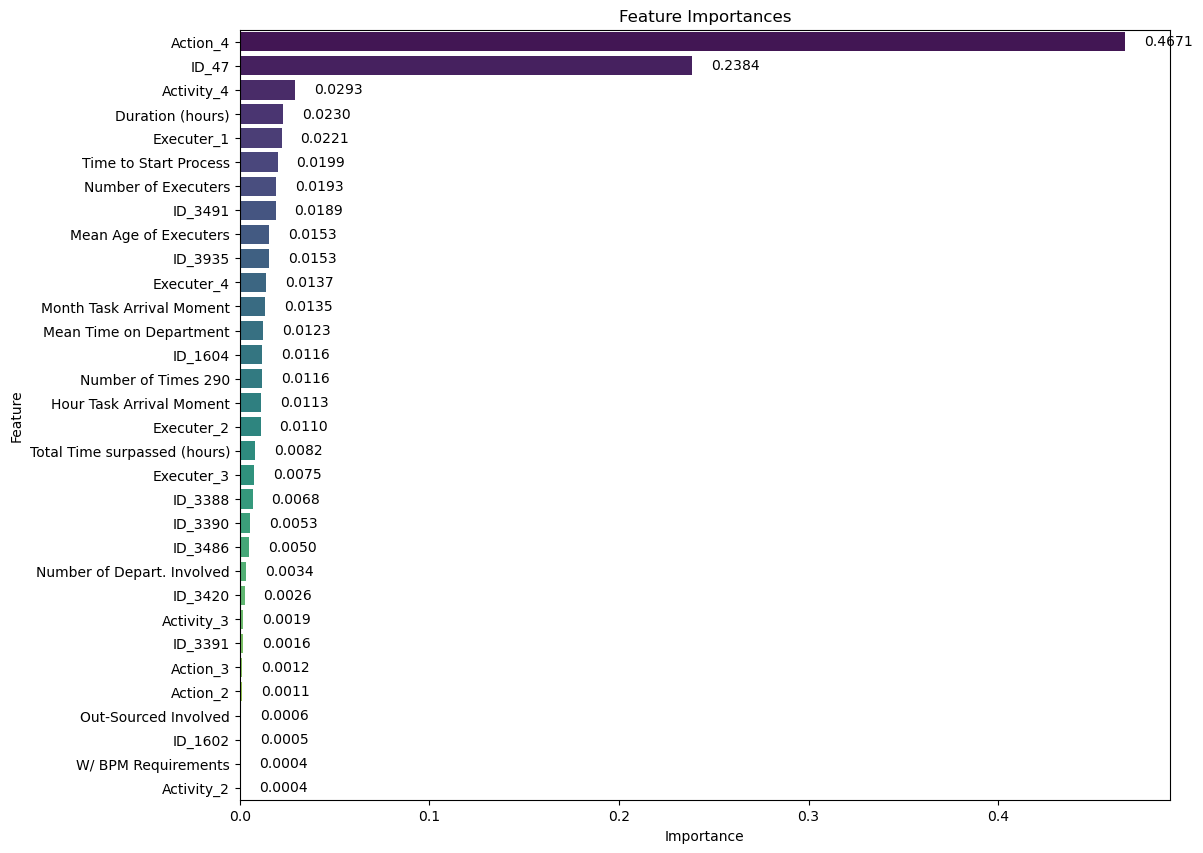

Dataset: prefix_6


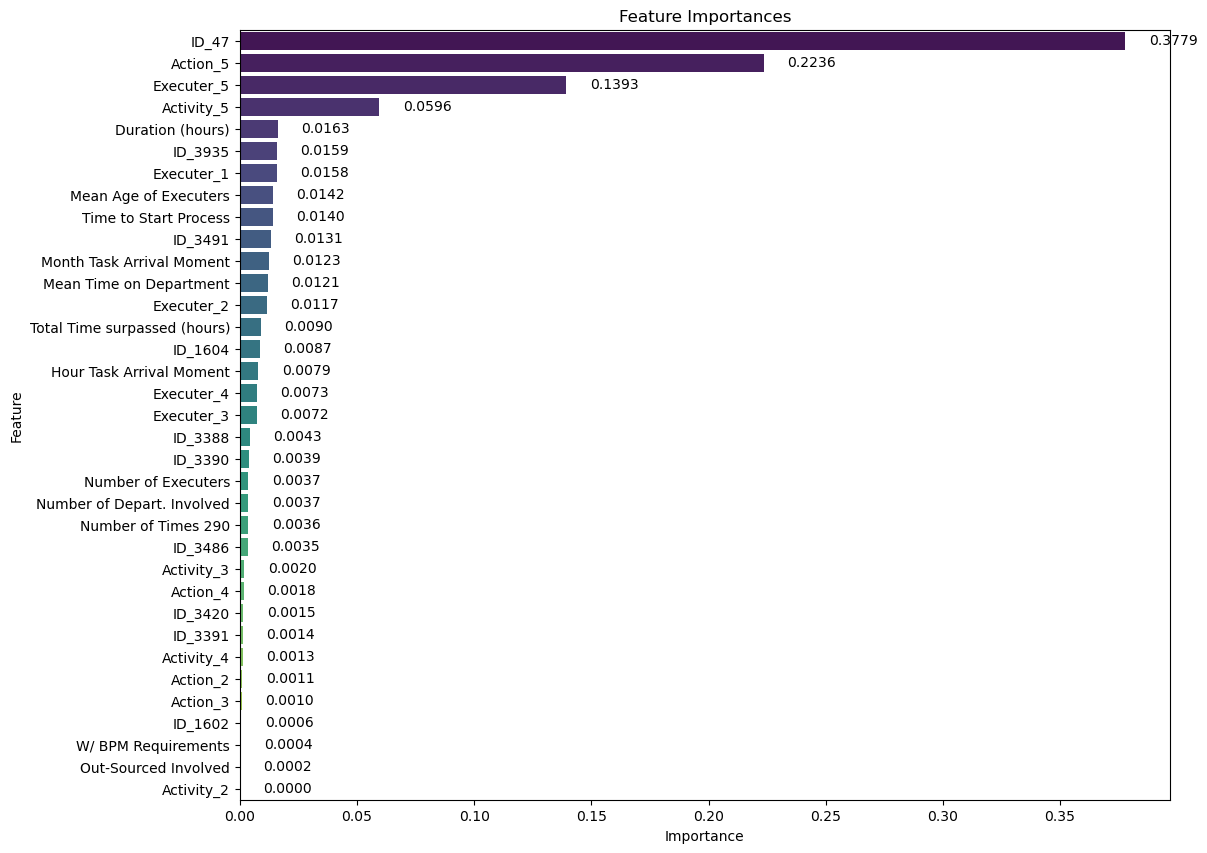

Dataset: prefix_7


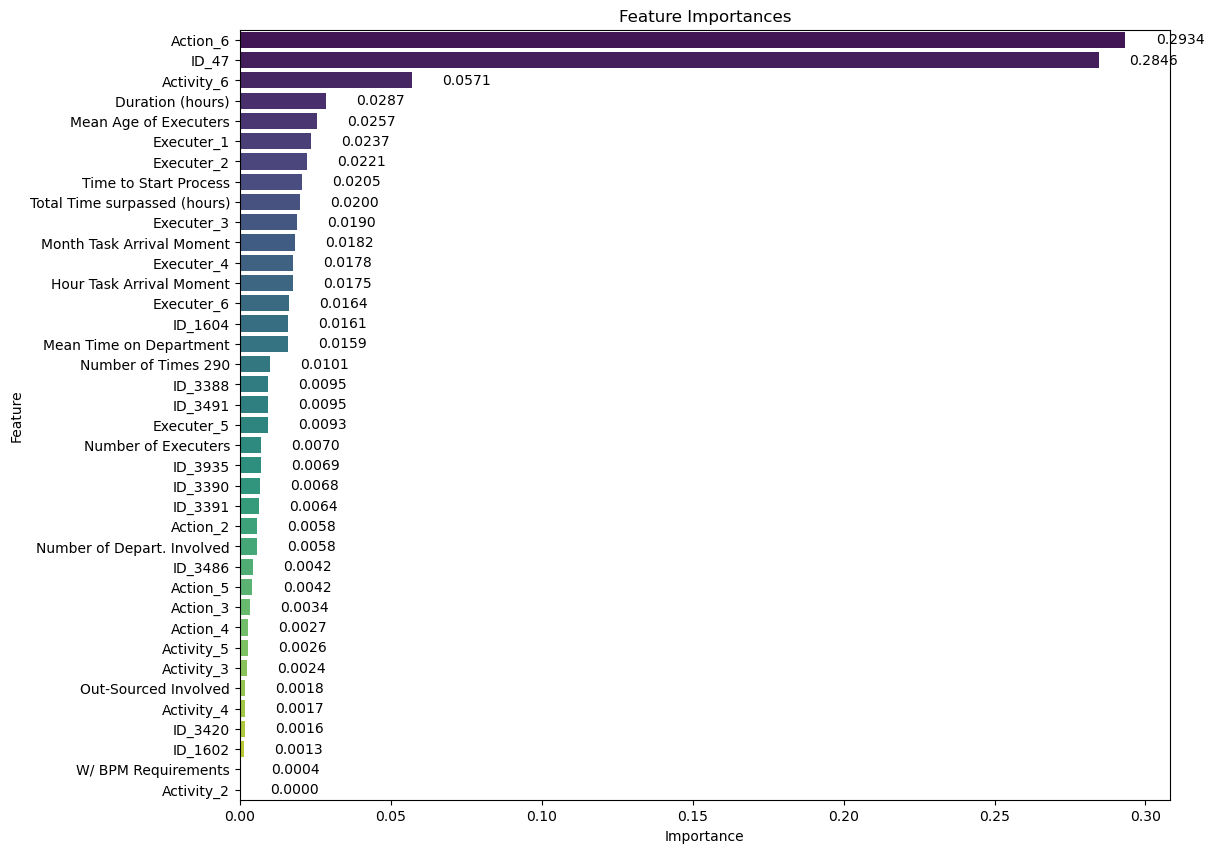

Dataset: prefix_8


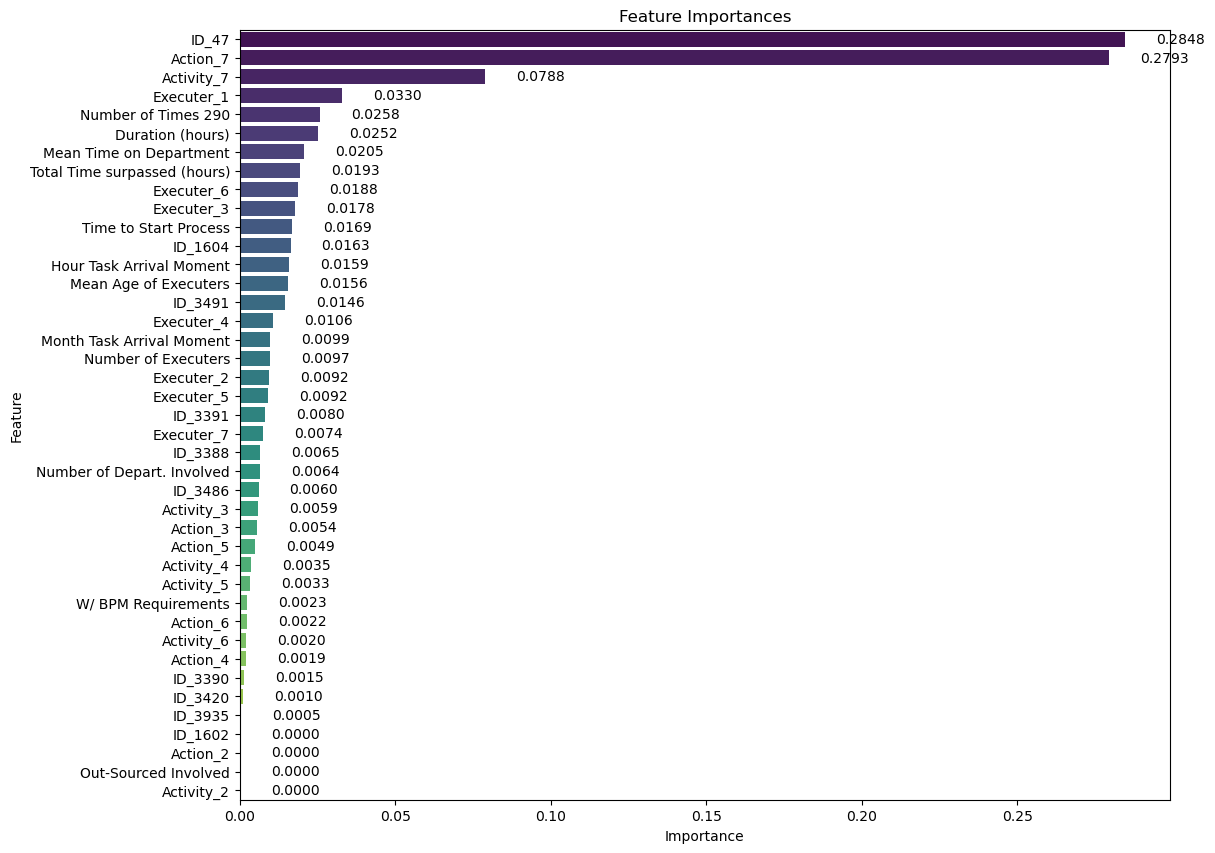

In [85]:
for name, dataset in datasets.items():
    print(colored(f"Dataset: {name}", attrs=['bold']))
    cf.get_model_importance_dt(dataset, "Outcome")

*FEATURE REDUCTION*

Mostly, removing Total Time surpassed (hours) and the bottom columns on the importance graph resulted in better results

In [86]:
prefix_1.drop(["ID_1602"], axis=1, inplace=True)

prefix_2.drop(["ID_1602"], axis=1, inplace=True)

prefix_3.drop(["ID_1602", "Total Time surpassed (hours)"], axis=1, inplace=True)

prefix_4.drop(["ID_1602", "Total Time surpassed (hours)", "Number of Executers"], axis=1, inplace=True)

prefix_5.drop(["ID_1602", "W/ BPM Requirements", "Activity_2", "Total Time surpassed (hours)", "Action_2"], axis=1, inplace=True)

prefix_6.drop(["ID_1602", "W/ BPM Requirements", "Activity_2", "Total Time surpassed (hours)", "Out-Sourced Involved"], axis=1, inplace=True)

prefix_7.drop(["Action_2", "Activity_2", "Total Time surpassed (hours)", "Out-Sourced Involved"], axis=1, inplace=True)

prefix_8.drop(["Activity_6", "Activity_2", "Total Time surpassed (hours)", "Out-Sourced Involved", "Activity_5", "Activity_4"], axis=1, inplace=True)

<hr>

<a class="anchor" id="4">

# 4. Export

</a>

In [87]:
for name, dataset in datasets.items():
    dataset.to_csv(f"{name}.csv", index=False)